# H_DES model: Train

# a. Time Series - Double Exponential Smoothing (DES)

In [2]:
import numpy as np
import pandas as pd

In [3]:
import util as u

In [4]:
base_path = "data/I88N-processed/"

In [5]:
# import concatenated data, and available days to sample from
concat_1 = pd.read_csv(base_path + "concat/concat_1.csv")
concat_2 = pd.read_csv(base_path + "concat/concat_2.csv")
concat_3 = pd.read_csv(base_path + "concat/concat_3.csv")

In [57]:
datetime_1 = concat_1["datetime"].values
datetime_1 = pd.to_datetime(datetime_1)

In [196]:
dataset_df_1 = concat_1.loc[concat_1["Date"].isin(dates_format_1)]

In [197]:
dataset_df_2 = concat_2.loc[concat_2["Date"].isin(dates_format_2)]
dataset_df_3 = concat_3.loc[concat_3["Date"].isin(dates_format_2)]

In [202]:
dataset_df_2["Station ID"].unique()

array([400141, 400761, 400490, 401888, 400137, 400716, 401545, 401011,
       400674, 400539, 400534, 401062, 401529, 401613, 400536, 400488,
       401561, 400611, 400928, 400284, 400041, 408133, 408135, 417665,
       412637, 417666, 408134, 400685, 401003, 400898, 400275, 400939,
       400180, 400529, 400990])

In [205]:
len(dataset_df_2.loc[dataset_df_2["Station ID"] == 417666].values)

64512

In [200]:
dates = available_dates

In [206]:
len(dates)

224

The total number of samples collected at one station across all days is 97344, which is equal to 338 days * 24 hours/day * 12 samples/hour.

In [260]:
dataset_df_1.head(3)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,idx
33395,408907,2017-04-30 00:00:00,0.6,26.0,68.4,04/30/2017,00:00,33395
33396,408907,2017-04-30 00:05:00,1.1,42.0,67.5,04/30/2017,00:05,33396
33397,408907,2017-04-30 00:10:00,1.0,41.0,68.1,04/30/2017,00:10,33397


In [6]:
dataset_df_1 = pd.read_csv(base_path + "concat_no_holes/concat_1.csv")
dataset_df_2 = pd.read_csv(base_path + "concat_no_holes/concat_2.csv")
dataset_df_3 = pd.read_csv(base_path + "concat_no_holes/concat_3.csv")

In [8]:
concats = pd.read_csv(base_path + "concat_no_holes/concat.csv")

In [52]:
concat = concats

In [264]:
concat.to_csv(base_path + "concat_no_holes/concat.csv")

In [9]:
available_dates_str = pd.read_csv(base_path + "available_dates.csv").iloc[:, 0].values

In [10]:
available_dates_str[:3]

array(['2017-04-30', '2017-05-01', '2017-05-02'], dtype=object)

In [70]:
dates = list(map(lambda x: pd.to_datetime(x).date(), available_dates_str))

In [21]:
# dataset_df_1 = dataset_df_1.drop(["Unnamed: 0"], axis=1)
dataset_df_1.to_csv(base_path + "concat_no_holes/concat_1.csv", index=False)

In [20]:
# dataset_df_2 = dataset_df_2.drop(["Unnamed: 0"], axis=1)
dataset_df_2.to_csv(base_path + "concat_no_holes/concat_2.csv", index=False)

In [22]:
dataset_df_3 = dataset_df_3.drop(["Unnamed: 0"], axis=1)
dataset_df_3.to_csv(base_path + "concat_no_holes/concat_3.csv", index=False)

In [23]:
concats = concats.drop(["Unnamed: 0"], axis=1)
concats.to_csv(base_path + "concat_no_holes/concat.csv", index=False)

In [24]:
dataset_df_1.head(1)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,idx
0,408907,2017-04-30 00:00:00,0.6,26.0,68.4,04/30/2017,00:00,33395


In [25]:
dataset_df_2.head(1)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,idx
0,400141,2017-04-30 00:00:00,2.7,175.0,68.1,04/30/2017,00:00,33396


In [26]:
dataset_df_3.tail(1)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,idx
2064383,401471,2017-12-30 23:55:00,4.0,210.0,60.8,12/30/2017,23:55,3252717


In [71]:
concat.head(1)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,idx
0,408907,2017-04-30 00:00:00,0.6,26.0,68.4,04/30/2017,00:00,33395


In [28]:
dates[0:2]

[datetime.date(2017, 4, 30), datetime.date(2017, 5, 1)]

In [29]:
dates_format_1 = available_dates_str

In [30]:
dates_format_1[0:3]

array(['2017-04-30', '2017-05-01', '2017-05-02'], dtype=object)

In [72]:
dates_format_2 = list(map(lambda x: x.split('-')[1] + "/" + x.split('-')[2] + "/" + x.split('-')[0], available_dates_str))

In [73]:
dates_format_2[0:3]

['04/30/2017', '05/01/2017', '05/02/2017']

## Exception found: we want the dates to start from 2017-04-30

In [ ]:
available_dates[0:10]

In [188]:
pd.DataFrame(available_dates).to_csv(base_path + "available_dates.csv", index=False)

## Loading incidents

Upstream is of type int, and downstream is of type string, since the last station has no downstream by definition and each road segment has an upstream station.

In [33]:
incidents = pd.read_csv(base_path + "incidents.csv")

In [76]:
dates[0:3]

[datetime.date(2017, 4, 30),
 datetime.date(2017, 5, 1),
 datetime.date(2017, 5, 2)]

In [37]:
len(incidents["ID"].values)

6722

In [38]:
len(incidents.loc[incidents["Duration"].apply(lambda x: int(x) >= 5)]["ID"].values)

5234

In [39]:
valid_incidents = incidents.loc[incidents["Duration"].apply(lambda x: int(x) >= 5)]

In [40]:
valid_incidents.to_csv(base_path + "valid_incidents.csv")

# Is there any temporal correlation in the data?  Visulize data at one station, in one day

In [41]:
import matplotlib.pyplot as plt

In [53]:
stations = concat["Station ID"].unique()

There is a problem here.  The two stations, 417665 and 417666, have records starting from 2007-04-29, and started to collect data on 2007-04-30 (notice that speed, flow and occupancy are all constant on 2007-04-29).  Therefore we discard the data before date 2007-04-29.

In [46]:
len(valid_incidents)

5234

Finally, there are 224 days of data available for use, and the total number of records for each station is 64512.

In [54]:
len(stations)

102

In [55]:
stations[0:10]

array([408907, 400951, 400057, 400147, 400343, 401560, 400045, 400122,
       401541, 402281])

In [115]:
sample_station = np.random.choice(stations)
sample_date, sample_date2 = np.random.choice(dates, 2)

In [116]:
print(sample_station, sample_date, sample_date2)

400041 2017-09-13 2017-06-24


In [90]:
concat["Date"].values

array(['04/30/2017', '04/30/2017', '04/30/2017', ..., '12/30/2017',
       '12/30/2017', '12/30/2017'], dtype=object)

In [117]:
sample_df = concat.loc[(concat["Station ID"] == sample_station) & (concat["Date"] == sample_date.strftime("%m/%d/%Y"))]
sample_df2 = concat.loc[(concat["Station ID"] == sample_station) & (concat["Date"] == sample_date2.strftime("%m/%d/%Y"))]

### Occupancy (%)

In [102]:
sample_x = sample_df["Time"].values

<Figure size 432x288 with 0 Axes>

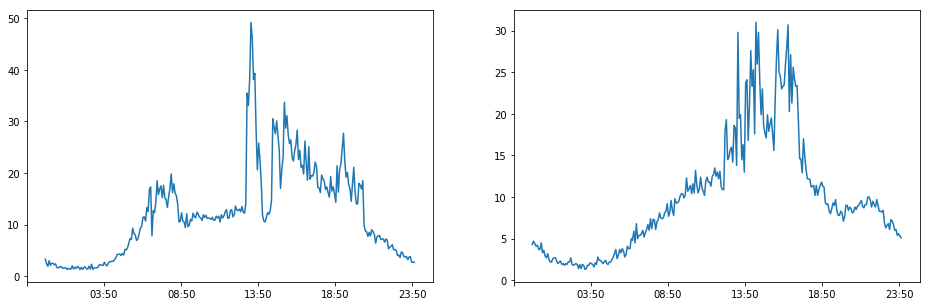

In [118]:
sample_occ = sample_df["Occupancy"].values
sample_occ2 = sample_df2["Occupancy"].values

plt.gcf().clear()
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.plot(sample_x, sample_occ)
ax2.plot(sample_x, sample_occ2)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 60))
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(start, end, 60))

plt.show()

### Flow (number of cars / 5 minutes)

<Figure size 432x288 with 0 Axes>

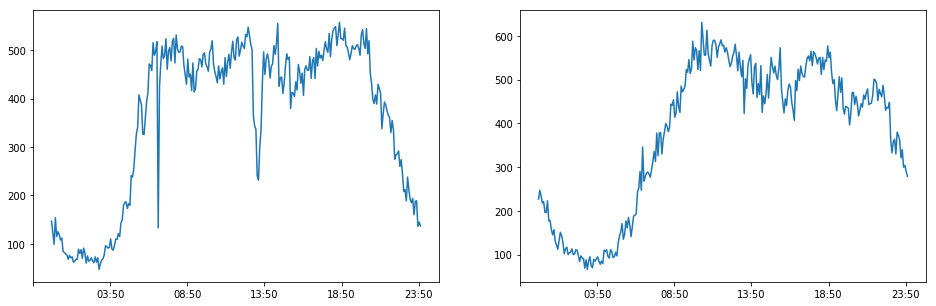

In [119]:
sample_flow = sample_df["Flow"].values
sample_flow2 = sample_df2["Flow"].values

plt.gcf().clear()
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.plot(sample_x, sample_flow)
ax2.plot(sample_x, sample_flow2)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 60))
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(start, end, 60))

plt.show()

### Speed (mph)

<Figure size 432x288 with 0 Axes>

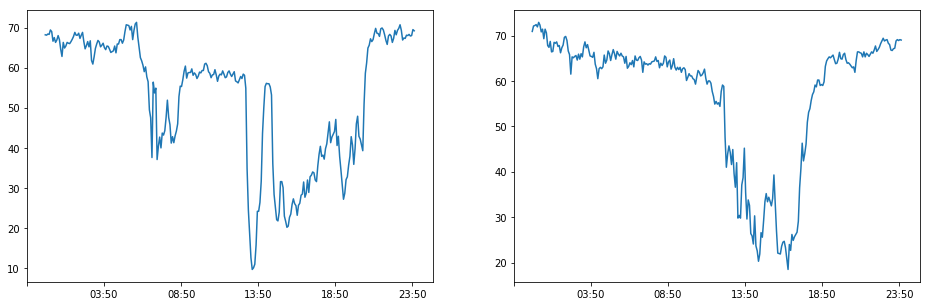

In [120]:
sample_speed = sample_df["Speed"].values
sample_speed2 = sample_df2["Speed"].values

plt.gcf().clear()
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.plot(sample_x, sample_speed)
ax2.plot(sample_x, sample_speed2)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 60))
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(start, end, 60))

plt.show()

# Bootstrapping data

TODO: One idea - we can keep a rational proportion between weekdays and weekends in the sample data.

In [121]:
len(dates)

224

In [122]:
dates_train = np.random.choice(dates, 112)

In [123]:
dates_test = list(set(dates).difference(set(dates_train)))
dates_test.sort()

In [124]:
len(dates_train), len(dates_test)

(112, 140)

In [125]:
dates_train_str = list(map(lambda x: x.strftime("%m/%d/%Y"), dates_train))
dates_test_str = list(map(lambda x: x.strftime("%m/%d/%Y"), dates_test))
dates_train_str.sort()
dates_test_str.sort()

In [126]:
dates_train_str[:3], dates_test_str[:3]

(['04/30/2017', '05/01/2017', '05/01/2017'],
 ['05/03/2017', '05/04/2017', '05/08/2017'])

In [306]:
df_train = concat.loc[concat["Date"].isin(dates_train_str)]
df_test = concat.loc[concat["Date"].isin(dates_test_str)]

In [128]:
df_train.head(3)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,idx
0,408907,2017-04-30 00:00:00,0.6,26.0,68.4,04/30/2017,00:00,33395
1,408907,2017-04-30 00:05:00,1.1,42.0,67.5,04/30/2017,00:05,33396
2,408907,2017-04-30 00:10:00,1.0,41.0,68.1,04/30/2017,00:10,33397


In [129]:
df_test.head(3)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,idx
864,408907,2017-05-03 00:00:00,0.7,27.0,67.3,05/03/2017,00:00,34259
865,408907,2017-05-03 00:05:00,0.8,32.0,68.5,05/03/2017,00:05,34260
866,408907,2017-05-03 00:10:00,0.4,13.0,67.7,05/03/2017,00:10,34261


## Step 1.  DES: Tune and save parameters for each variable, and each detector station

$$S_1(t) = \alpha X(i,t) + (1 - \alpha) S_1(t-1)$$
$$S_2(t) = \alpha S_1(t) + (1 - \alpha) S_2(t-1)$$
$$A(t) = 2S_1(t) - S_2(t)$$
$$B(t) = \frac{\alpha}{1 - \alpha} [S_1(t) - S_2(t)]$$
and finally,
$$Y(i, t+1) = A(i, t) + B(i, t),$$
where $i$ denotes a detector station named $i$.

### How to define "normal days" for a detector?

Of course a "normal" day is a day when no incident happens and the traffic state at the detector station is normal overall.  But how can we determine a normal day?

Suppose a lane-blocking incident happens between two adjacent road segments B (upstream) and E (downstream).  Then B and E are both likely to be affected because the occupancy at B may increase and E decrease in a short time.  Hence at present, let's suppose both B and E are affected, and the rest upstream and downstream stations are unaffected.

In [130]:
station = np.random.choice(stations)

In [131]:
station

402800

In [132]:
abnormal_dates_station = incidents.loc[(incidents["Upstream"] == station) | (incidents["Downstream"] == str(station))]["Date"].unique()
normal_dates_train = list(set(dates_train).difference(set(abnormal_dates_station)))
normal_dates_train.sort()
normal_dates_train_str = list(map(lambda x: x.strftime("%m/%d/%Y"), normal_dates_train))
df_train_station = df_train.loc[(df_train["Station ID"] == station) & (df_train["Date"].isin(normal_dates_train_str))]

In [133]:
df_train_station.head(5)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,idx
1419264,402800,2017-04-30 00:00:00,2.5,218.0,72.4,04/30/2017,00:00,2269619
1419265,402800,2017-04-30 00:05:00,1.8,151.0,72.1,04/30/2017,00:05,2269620
1419266,402800,2017-04-30 00:10:00,2.1,173.0,71.3,04/30/2017,00:10,2269621
1419267,402800,2017-04-30 00:15:00,2.0,173.0,72.0,04/30/2017,00:15,2269622
1419268,402800,2017-04-30 00:20:00,2.0,172.0,71.7,04/30/2017,00:20,2269623


In [240]:
var_name = "Speed"
var_series = df_train_station[var_name].values

In [241]:
var_series[:5]

array([68.7, 70.4, 70.3, 70.9, 65.5])

In [196]:
# initialize data using the first ten points
alphas = np.arange(1000) / 1000.
# for each alpha, perform exponential smoothing, and compute RMSE
alpha = np.random.choice(alphas)
beta = round(1. - alpha, 3)

In [197]:
alpha, beta

(0.074, 0.926)

In [261]:
alpha = .7
beta = .3

In [256]:
len(var_series)

24192

In [262]:
sse = 0.
s1 = [0.] * len(var_series)
s2 = [0.] * len(var_series)
y = [0.] * len(var_series)
# initialize values
s1[10] = np.mean(var_series[:10])
s2[10] = s1[10]
for i in range(11, len(var_series) - 1):
    s1[i] = alpha * var_series[i] + beta * s1[i-1]
    s2[i] = alpha * s1[i] + beta * s2[i-1]
    y[i+1] = 2 * s1[i] - s2[i] + alpha / beta * (s1[i] - s2[i])
    sse += (var_series[i+1] - y[i+1]) ** 2

In [263]:
# compute RMSE
diff = var_series - y
diff = diff[12:len(var_series)]

In [264]:
rmse = np.sqrt( np.mean(diff ** 2) )
rmse

3.0259644677551067

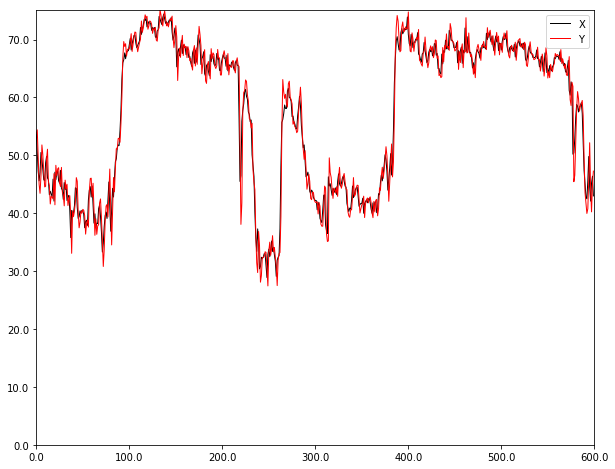

In [266]:
u.plot_time_series(var_series[20300:20900], y[20300:20900], X_label="X", Y_label="Y")

In [224]:
np.sqrt( sse/ (len(var_series) - 12) )

2.0930696264644015

*TODO*: We don't actually need the vectors s1, s2 and y to get rmse.  Implement a memory-efficient solution.

### Memory-efficient form

In [225]:
sse = 0.
s1 = np.mean(var_series[:10])
s2 = s1
y = None
for i in range(11, len(var_series) - 1):
    s1 = alpha * var_series[i] + beta * s1
    s2 = alpha * s1 + beta * s2
    y_next = 2 * s1 - s2 + alpha / beta * (s1 - s2)
    sse += (var_series[i+1] - y_next) ** 2

In [226]:
np.sqrt( sse/ (len(var_series) - 12) )

2.0930696264644015

## Put the above code together!

We also want to save the best alphas for each variable. Use a dictionary, transform it to pandas dataframe, and save to csv.

In [146]:
var_names = ["Speed", "Flow", "Occupancy"]

In [227]:
def DES_rmse(alpha, var_series):
    len_series = len(var_series)
    
    beta = round(1. - alpha, 3)

    sse = 0.
    s1 = np.mean(var_series[:10])
    s2 = s1
    
    for i in range(11, len_series - 1):
        s1 = alpha * var_series[i] + beta * s1
        s2 = alpha * s1 + beta * s2
        y_next = 2 * s1 - s2 + alpha / beta * (s1 - s2)
        sse += (var_series[i+1] - y_next) ** 2
    
    return np.sqrt( sse / (len_series - 12) )

In [228]:
DES_rmse(alpha, var_series)

2.0930696264644015

In [237]:
DES_rmse_vector(alpha, var_series)

2.093069626464403

In [236]:
def DES_rmse_vector(alpha, var_series):
    len_series = len(var_series)
    
    beta = round(1. - alpha, 3)
    s1 = [0.] * len_series
    s2 = [0.] * len_series
    y = [0.] * len_series

    # initialize values
    s1[10] = np.mean(var_series[:10])
    s2[10] = s1[10]
    
    # time series prediction
    for t in range(11, len_series - 1):
        s1[t] = alpha * var_series[t] + beta * s1[t-1]
        s2[t] = alpha * s1[t] + beta * s2[t-1]
        y[t+1] = 2 * s1[t] - s2[t] + alpha / beta * (s1[t] - s2[t])

    # compute RMSE
        diff = var_series - y
        diff = diff[12:len(var_series)]
        rmse = np.sqrt( np.mean(diff ** 2) )
    
    return rmse

In [238]:
best_alphas = {
    'Station ID': [],
    'Speed': [],
    'Flow': [],
    'Occupancy': []
}
num_grids = 10
for i, station in enumerate(stations):
    best_alphas['Station ID'].append(station)
    
    # update current training station dataframe, the training data is normal day's data
    abnormal_dates_station = incidents.loc[(incidents["Upstream"] == station) | (incidents["Downstream"] == str(station))]["Date"].unique()
    normal_dates_train = list(set(dates_train).difference(set(abnormal_dates_station)))
    normal_dates_train_str = list(map(lambda x: x.strftime("%m/%d/%Y"), normal_dates_train))
    df_train_station = df_train.loc[(df_train["Station ID"] == station) & (df_train["Date"].isin(normal_dates_train_str))]

    df_train_station = df_train.loc[df_train["Station ID"] == station]
    print(station)
    for var_name in var_names:
        var_series = df_train_station[var_name].values
        len_series = len(var_series)
        
        # setting up alphas
        alphas = np.arange(num_grids) * 1. / num_grids
        
        # save the historical best alpha by rmse
        best_rmse = float("inf")
        best_alpha = 0.
        
        # for each alpha, perform exponential smoothing, and compute RMSE
        for alpha in alphas:
            beta = round(1. - alpha, 3)
            s1 = [0.] * len_series
            s2 = [0.] * len_series
            y = [0.] * len_series
            
            # initialize values
            s1[10] = np.mean(var_series[:10])
            s2[10] = s1[10]
            
            # time series prediction
            for t in range(11, len_series-1):
                s1[t] = alpha * var_series[t] + beta * s1[t-1]
                s2[t] = alpha * s1[t] + beta * s2[t-1]
                y[t+1] = 2 * s1[t] - s2[t] + alpha / beta * (s1[t] - s2[t])
            
            # compute RMSE
            diff = var_series - y
            diff = diff[12:len(var_series)]
            rmse = np.sqrt( np.mean(diff ** 2) )
            
            # compare, and decide whether to update best alpha
            if rmse < best_rmse:
                best_rmse = rmse
                best_alpha = alpha
        
        # finally, save the best alpha for the variable at this station
        best_alphas[var_name].append(best_alpha)
    
    # print trained alphas for each station
    print(best_alphas['Station ID'][i], best_alphas['Speed'][i], best_alphas['Flow'][i], best_alphas['Occupancy'][i])

408907
408907 0.7 0.2 0.5
400951
400951 0.7 0.2 0.5
400057
400057 0.7 0.2 0.4
400147
400147 0.7 0.2 0.4
400343
400343 0.7 0.2 0.4
401560
401560 0.6 0.2 0.3
400045
400045 0.7 0.2 0.3
400122
400122 0.7 0.3 0.4
401541
401541 0.6 0.2 0.3
402281
402281 0.5 0.2 0.3
402283
402283 0.4 0.2 0.3
402285
402285 0.5 0.2 0.3
402286
402286 0.4 0.2 0.2
400088
400088 0.4 0.2 0.2
402288
402288 0.4 0.2 0.2
413026
413026 0.5 0.2 0.4
401464
401464 0.6 0.2 0.4
401489
401489 0.6 0.2 0.5
401538
401538 0.4 0.2 0.3
402290
402290 0.5 0.2 0.4
402292
402292 0.6 0.2 0.4
401643
401643 0.7 0.2 0.4
402800
402800 0.5 0.3 0.3
402828
402828 0.7 0.2 0.3
407219
407219 0.6 0.2 0.3
402789
402789 0.6 0.2 0.3
408755
408755 0.7 0.2 0.3
402802
402802 0.6 0.1 0.2
408756
408756 0.7 0.2 0.3
400189
400189 0.6 0.2 0.3
400309
400309 0.6 0.2 0.3
400417
400417 0.5 0.2 0.3
400249
400249 0.7 0.2 0.4
401639
401639 0.8 0.2 0.5
400662
400662 0.6 0.2 0.3
400141
400141 0.6 0.2 0.3
400761
400761 0.6 0.2 0.3
400490
400490 0.5 0.2 0.3
401888
40188

KeyboardInterrupt: 

### Memory-efficient version

The time needed to find optimal alpha for three traffic variables at one single detector station is approximately 2 minutes.

In [267]:
best_alphas = {
    'Station ID': [],
    'Speed': [],
    'Flow': [],
    'Occupancy': []
}
num_grids = 1000
for i, station in enumerate(stations):
    best_alphas['Station ID'].append(station)
    
    # update current training station dataframe, the training data is normal day's data
    abnormal_dates_station = incidents.loc[(incidents["Upstream"] == station) | (incidents["Downstream"] == str(station))]["Date"].unique()
    normal_dates_train = list(set(dates_train).difference(set(abnormal_dates_station)))
    normal_dates_train_str = list(map(lambda x: x.strftime("%m/%d/%Y"), normal_dates_train))
    df_train_station = df_train.loc[(df_train["Station ID"] == station) & (df_train["Date"].isin(normal_dates_train_str))]

    df_train_station = df_train.loc[df_train["Station ID"] == station]
    print(station)
    for var_name in var_names:
        var_series = df_train_station[var_name].values
        len_series = len(var_series)
        
        # setting up alphas
        alphas = np.arange(num_grids) * 1. / num_grids
        
        # save the historical best alpha by rmse
        best_rmse = float("inf")
        best_alpha = 0.
        
        # for each alpha, perform exponential smoothing, and compute RMSE
        for alpha in alphas:
            rmse = DES_rmse(alpha, var_series)
            
            # compare, and decide whether to update best alpha
            if rmse < best_rmse:
                best_rmse = rmse
                best_alpha = alpha
        
        # finally, save the best alpha for the variable at this station
        best_alphas[var_name].append(best_alpha)
    
    # print trained alphas for each station
    print(best_alphas['Station ID'][i], best_alphas['Speed'][i], best_alphas['Flow'][i], best_alphas['Occupancy'][i])

408907
408907 0.72 0.201 0.525
400951
400951 0.742 0.212 0.524
400057
400057 0.738 0.218 0.443
400147
400147 0.724 0.235 0.419
400343
400343 0.683 0.239 0.363
401560
401560 0.592 0.177 0.319
400045
400045 0.679 0.182 0.279
400122
400122 0.704 0.255 0.407
401541
401541 0.641 0.225 0.292
402281
402281 0.534 0.214 0.295
402283
402283 0.441 0.228 0.305
402285
402285 0.528 0.184 0.281
402286
402286 0.448 0.193 0.186
400088
400088 0.425 0.184 0.169
402288
402288 0.394 0.241 0.161
413026
413026 0.506 0.173 0.382
401464
401464 0.572 0.198 0.427
401489
401489 0.61 0.209 0.451
401538
401538 0.371 0.208 0.337
402290
402290 0.539 0.211 0.392
402292
402292 0.628 0.22 0.383
401643
401643 0.696 0.232 0.404
402800
402800 0.52 0.253 0.29
402828
402828 0.68 0.191 0.326
407219
407219 0.56 0.194 0.295
402789
402789 0.598 0.244 0.321
408755
408755 0.714 0.217 0.34
402802
402802 0.565 0.136 0.206
408756
408756 0.696 0.211 0.345
400189
400189 0.588 0.208 0.268
400309
400309 0.6 0.21 0.302
400417
400417 0.514

In [269]:
best_alphas_df = pd.DataFrame(best_alphas)
best_alphas_df.to_csv(base_path + "best_alphas.csv", index=False)

## Step 2.  DES: Predict for each detector, each variable, and each time

After this step we will have all the data needed to train the SVM: speed, flow, occupancy, and their predictions.

As always, we start from a small sample.  It will also be helpful, by the way, to prepare for a dictionary which maps each detector station to their relative position on the highway, i.e., 0, 1, ..., 101.  This will facilitate access to other traffic variables.

In [272]:
sid_to_idx = dict()
for i, station in enumerate(stations):
    sid_to_idx[station] = i

In [276]:
sid_to_idx.get(400343)

4

In [277]:
sample_station = np.random.choice(stations)

In [278]:
sample_station

400761

In [283]:
# get sample station idx
sample_station_idx = sid_to_idx.get(sample_station)
sample_station_idx

36

In [280]:
df_sample_station = df_train.loc[df_train["Station ID"] == sample_station]

In [282]:
df_sample_station.tail(2)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,idx
2386654,400761,2017-12-29 23:50:00,2.9,166.0,69.9,12/29/2017,23:50,203006
2386655,400761,2017-12-29 23:55:00,3.3,185.0,69.3,12/29/2017,23:55,203007


In [284]:
# initialize prediction dictionary
pred_dict = dict()
for var_name in var_names:
    pred_dict[var_name] = []

In [295]:
# formulate predictions of speed, flow and occupancy for the sample station
for var_name in var_names:
    var_series = df_sample_station[var_name].values
    len_series = len(var_series)
    # initialize s1, s2, and y
    s1 = np.mean(var_series[:10])
    s2 = s1
    y = [0.] * len_series
    # get the best alpha
    var_best_alpha = best_alphas_df.loc[best_alphas_df["Station ID"] == sample_station][var_name].values[0]
    beta = 1. - var_best_alpha
    
    for t in range(11, len_series - 1):
        s1 = var_best_alpha * var_series[t] + beta * s1
        s2 = var_best_alpha * s1 + beta * s2
        y[t+1] = 2 * s1 - s2 + alpha / beta * (s1 - s2)
    
    # save the predictions to a dictionary
    pred_dict[var_name].extend(y)

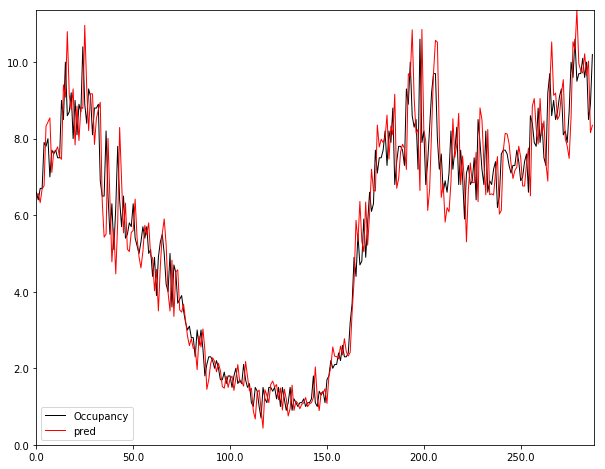

In [318]:
plot_var = 'Occupancy'
sample_station_var = df_sample_station[plot_var].values
u.plot_time_series(sample_station_var[21500:21788], pred_dict[plot_var][21500:21788], X_label=plot_var, Y_label='pred')

### Glue the code above together!

In [762]:
# initialization
# initialize prediction dictionary
pred_dict_train = dict()
for var_name in var_names:
    pred_dict_train[var_name] = []

for station in stations:
    print("Start time series prediction (DES) at station " + str(station) + "...")
    df_train_station = df_train.loc[df_train["Station ID"] == station]
    
    # formulate predictions of speed, flow and occupancy for the station
    for var_name in var_names:
        print("    Start predicting variable " + var_name + "...")
        var_series = df_train_station[var_name].values
        len_series = len(var_series)
        # initialize s1, s2, and y
        s1 = np.mean(var_series[:10])
        s2 = s1
        y = [0.] * len_series
        # get the best alpha
        var_best_alpha = best_alphas_df.loc[best_alphas_df["Station ID"] == station][var_name].values[0]
        beta = 1. - var_best_alpha

        for t in range(11, len_series - 1):
            s1 = var_best_alpha * var_series[t] + beta * s1
            s2 = var_best_alpha * s1 + beta * s2
            y[t+1] = 2 * s1 - s2 + alpha / beta * (s1 - s2)

        # save the predictions to a dictionary
        pred_dict_train[var_name].extend(y)
        print("    End predicting variable " + var_name + ".")
    print("End prediction at station " + str(station) + ".")

Start time series prediction (DES) at station 408907...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End prediction at station 408907.
Start time series prediction (DES) at station 400951...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End prediction at station 400951.
Start time series prediction (DES) at station 400057...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End prediction at station 400057.
Start time series prediction (DES) at station 

    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End prediction at station 408755.
Start time series prediction (DES) at station 402802...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End prediction at station 402802.
Start time series prediction (DES) at station 408756...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End prediction at station 408756.
Start time series prediction (DES) at station 400189...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start p

    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End prediction at station 400611.
Start time series prediction (DES) at station 400928...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End prediction at station 400928.
Start time series prediction (DES) at station 400284...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End prediction at station 400284.
Start time series prediction (DES) at station 400041...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start pr

    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End prediction at station 410363.
Start time series prediction (DES) at station 400360...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End prediction at station 400360.
Start time series prediction (DES) at station 400955...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End prediction at station 400955.
Start time series prediction (DES) at station 400495...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start p

In [763]:
pred_speed_train = pred_dict_train['Speed']
pred_flow_train = pred_dict_train['Flow']
pred_occ_train = pred_dict_train['Occupancy']

In [765]:
len(pred_speed_train)

2467584

In [766]:
len(df_train.index)

2467584

In [767]:
df_train.head(3)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,Pred Speed,Pred Flow,Pred Occupancy
0,408907,2017-04-30 00:00:00,0.6,26.0,68.4,04/30/2017,00:00,0.0,0.0,0.0
1,408907,2017-04-30 00:05:00,1.1,42.0,67.5,04/30/2017,00:05,0.0,0.0,0.0
2,408907,2017-04-30 00:10:00,1.0,41.0,68.1,04/30/2017,00:10,0.0,0.0,0.0


In [768]:
for var_name in var_names:
    df_train["Pred " + var_name] = pred_dict_train[var_name]

In [769]:
df_train.iloc[1100:1105]

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,Pred Speed,Pred Flow,Pred Occupancy
1676,408907,2017-05-06 19:40:00,3.5,151.0,68.0,05/06/2017,19:40,66.114305,95.881423,2.543943
1677,408907,2017-05-06 19:45:00,3.7,162.0,68.3,05/06/2017,19:45,68.042863,105.796562,3.418121
1678,408907,2017-05-06 19:50:00,3.8,163.0,67.9,05/06/2017,19:50,68.664106,120.139040,3.897696
1679,408907,2017-05-06 19:55:00,3.3,143.0,67.6,05/06/2017,19:55,67.867707,131.548914,4.081295
1680,408907,2017-05-06 20:00:00,3.2,139.0,69.5,05/06/2017,20:00,67.329746,128.855685,3.395762


In [316]:
df_train = df_train.drop(["idx"], axis=1)

In [770]:
# save the final results of DES forecasting
df_train.to_csv(base_path + "post_DES_data.csv", index=False)

# SVM Module

In [413]:
import datetime as dt

There are two stages: 1. Feature vector generation (negative & positive); 2. SVM training.

## 1. Feature generation

The difference between positive and negative features is only time.  Hence we need to construct two different vectors of time: negative times and positive times.

We can construct a list of road segments, which are tuples with the first item being the upstream station B, and the second item being the downstream E.

In [320]:
road_segments = list()
for i in range(len(stations) - 1):
    road_segments.append((stations[i], stations[i+1]))

In [322]:
len(road_segments)

101

### 1.1 Construction of negative times

The authors used *all* the instances generated from *all* detectors in *a day* **without** incidents as the negative input.  The day was randomly selected from the training dataset.

In [372]:
valid_incidents.head(3)

,ID,Date,Time,Duration,Upstream,Downstream
1,16917196,01/01/2017,02:14,14,400765,400844
2,16917233,01/01/2017,02:44,6,400309,400417
4,16917615,01/01/2017,09:25,12,408134,400685


In [374]:
incident_dates = valid_incidents["Date"].unique()
neg_date_train = np.random.choice(list(set(dates_train).difference(set(incident_dates))))

In [375]:
neg_date_train

datetime.date(2017, 7, 23)

In [376]:
neg_date_train_str = neg_date_train.strftime("%m/%d/%Y")

In our sample: we assume the first ten time slots were used to initialize daily traffic.  Therefore, we exclude '00:00' to '00:45'.  Moreover, since extra 4 timeslots are needed to construct a vector for an upstream detector station, an additional 4 time slots are trimmed from the dates.  In total, 14 time slots are excluded, and the time we choose fall between '01:10' and '23:55' inclusively.

*TODO* Is there a selection bias? What can we do to mitigate the effect of ignoring the pattern in over one hour?

In [640]:
sample_times = df_train["Time"].unique().tolist()

In [641]:
len(sample_times)

288

In [643]:
print(sample_times[0:14])

['00:00', '00:05', '00:10', '00:15', '00:20', '00:25', '00:30', '00:35', '00:40', '00:45', '00:50', '00:55', '01:00', '01:05']


In [435]:
sample_times = sample_times[14:].tolist()

In [636]:
sample_times[0:3]

['01:10', '01:15', '01:20']

In [644]:
neg_times = sample_times[14:]

In [645]:
neg_times[0:3]

['01:10', '01:15', '01:20']

Working time is defined as the time when a TSA model has forecasts.

In [648]:
working_time = sample_times[10:]

In [649]:
working_time[0:3]

['00:50', '00:55', '01:00']

### 1.2 Construction of positive times

The authors used *all* instances *during the incident time* in the *training dataset* as positive instances.

To get the positive times we need a particular road segment.

In [355]:
num_segments = len(road_segments)
sample_segment = road_segments[np.random.choice(num_segments)]

In [359]:
sample_segment

(408907, 400951)

In [360]:
B, E = sample_segment

In [378]:
valid_incidents.head(3)

,ID,Date,Time,Duration,Upstream,Downstream
1,16917196,01/01/2017,02:14,14,400765,400844
2,16917233,01/01/2017,02:44,6,400309,400417
4,16917615,01/01/2017,09:25,12,408134,400685


In [394]:
# get all the date time tuples when there was an incident
valid_incidents_train = valid_incidents.loc[valid_incidents["Date"].isin(dates_train_str)]
df_segment = valid_incidents_train.loc[valid_incidents_train["Upstream"] == str(B)]

In [395]:
df_segment

,ID,Date,Time,Duration,Upstream,Downstream
2438,17200907,05/15/2017,13:49,26,408907,400951
2502,17208476,05/19/2017,05:27,22,408907,400951
5334,17538271,10/19/2017,07:13,156,408907,400951
6390,17650637,12/11/2017,09:49,5,408907,400951
6577,17670362,12/20/2017,12:37,7,408907,400951


In [396]:
segment_dates = df_segment["Date"].values
segment_times = df_segment["Time"].values
segment_duration = df_segment["Duration"].values

In [400]:
num_segment_incidents = len(segment_dates)

In [401]:
num_segment_incidents

5

In [397]:
segment_dates

array(['05/15/2017', '05/19/2017', '10/19/2017', '12/11/2017',
       '12/20/2017'], dtype=object)

In [398]:
segment_times

array(['13:49', '05:27', '07:13', '09:49', '12:37'], dtype=object)

In [421]:
segment_duration = segment_duration.tolist()

In [408]:
def floor_datetime(dt_object):
    minute = dt_object.minute
    diff = minute % 5
    
    return dt_object.replace(minute=minute-diff)

In [414]:
def ceil_datetime(dt_object):
    minute = dt_object.minute
    diff = minute % 5
    
    if diff != 0:
        return dt_object + dt.timedelta(minutes=5-diff)
    else:
        return dt_object

In [409]:
dummy_date = pd.Timestamp(segment_dates[0] + ' ' + segment_times[0] + ':00')

In [410]:
dummy_date_floor = floor_datetime(dummy_date)

In [415]:
dummy_date_ceil = ceil_datetime(dummy_date)

In [411]:
dummy_date

Timestamp('2017-05-15 13:49:00')

In [426]:
pos_times = set()
for i in range(num_segment_incidents):
    start_dt = pd.Timestamp(segment_dates[i] + ' ' + segment_times[i] + ':00')
    end_dt = start_dt + dt.timedelta(minutes=segment_duration[i])
    rounded_start_dt = ceil_datetime(start_dt)
    rounded_end_dt = floor_datetime(end_dt)
    next_dt = rounded_start_dt
    
    while next_dt <= rounded_end_dt:
        # note we should add a new object to pos_times
        pos_times.add(next_dt)
        next_dt += dt.timedelta(minutes=5)

pos_times = sorted(pos_times)
pos_times = list(map(lambda x: ( x.strftime('%m/%d/%Y'), x.strftime('%H:%M') ), pos_times))

In [446]:
pos_times = [dt_tuple for dt_tuple in pos_times if dt_tuple[1] in sample_times]

In [447]:
pos_times[0:3]

[('05/15/2017', '13:50'), ('05/15/2017', '13:55'), ('05/15/2017', '14:00')]

### 1.3 Feature vector generation

So far we've finished the generation of timestamps for negative and positive instances.  How can we construct a feature vector using the above timestamps?

Try to construct a feature vector at one time, for one station first, say, B:

In [449]:
feature_B_t = []
# construct list of time with four time lags
d_B, t_B = neg_times[np.random.choice(len(neg_times))]
B_lags = []

In [450]:
dt_B = pd.Timestamp(d_B + ' ' + t_B + ':00')
for i in range(5):
    B_lags.append(dt_B - dt.timedelta(minutes=i*5))

In [452]:
B_lags = list(map(lambda x: (x.strftime('%m/%d/%Y'), x.strftime('%H:%M')) , B_lags))

In [456]:
for dt_lag in B_lags:
    d_lag, t_lag = dt_lag
    df_dt_lag = df_train.loc[(df_train["Station ID"] == B) & (df_train["Date"] == d_lag) & (df_train["Time"] == t_lag)]
    
    speed_B_t = df_dt_lag["Speed"].values[0]
    flow_B_t = df_dt_lag["Flow"].values[0]
    occ_B_t = df_dt_lag["Occupancy"].values[0]
    
    speed_pred_B_t = df_dt_lag["Pred Speed"].values[0]
    flow_pred_B_t = df_dt_lag["Pred Flow"].values[0]
    occ_pred_B_t = df_dt_lag["Pred Occupancy"].values[0]
    
    feature_B_t.extend([speed_B_t, flow_B_t, occ_B_t, speed_pred_B_t, flow_pred_B_t, occ_pred_B_t, speed_B_t - speed_pred_B_t, flow_B_t - flow_pred_B_t, occ_B_t - occ_pred_B_t])

In [458]:
len(feature_B_t)

45

Now construct all negative feature vectors for the sample road segment $s_{BE}$:

In [466]:
X_neg = []
B, E = sample_segment
print("Start constructing feature vectors for road segment: " + str(B) + ", " + str(E) + "...")
progress_count = 0
total_count = len(neg_times)
print("Total number of vectors: " + str(total_count))

for dt_neg in neg_times:
    print("    Date and time: " + str(dt_neg))
    d_neg, t_neg = dt_neg
    feature_t = []
    dt_neg_timestamp = pd.Timestamp(d_neg + ' ' + t_neg + ':00')
    
    # upstream features
    B_lags = []
    for i in range(5):
        B_lags.append(dt_neg_timestamp - dt.timedelta(minutes=i*5))
    B_lags = list(map(lambda x: (x.strftime('%m/%d/%Y'), x.strftime('%H:%M')) , B_lags))
    for dt_lag in B_lags:
        d_lag, t_lag = dt_lag
        df_dt_lag = df_train.loc[(df_train["Station ID"] == B) & (df_train["Date"] == d_lag) & (df_train["Time"] == t_lag)]

        speed_B_t = df_dt_lag["Speed"].values[0]
        flow_B_t = df_dt_lag["Flow"].values[0]
        occ_B_t = df_dt_lag["Occupancy"].values[0]

        speed_pred_B_t = df_dt_lag["Pred Speed"].values[0]
        flow_pred_B_t = df_dt_lag["Pred Flow"].values[0]
        occ_pred_B_t = df_dt_lag["Pred Occupancy"].values[0]

        feature_t.extend([speed_B_t, flow_B_t, occ_B_t, speed_pred_B_t, flow_pred_B_t, occ_pred_B_t, speed_B_t - speed_pred_B_t, flow_B_t - flow_pred_B_t, occ_B_t - occ_pred_B_t])
    print("        ...Finished construction of upstream features.")
    # downstream features
    E_lags = B_lags[0:3]
    for dt_lag in E_lags:
        d_lag, t_lag = dt_lag
        df_dt_lag = df_train.loc[(df_train["Station ID"] == E) & (df_train["Date"] == d_lag) & (df_train["Time"] == t_lag)]

        speed_E_t = df_dt_lag["Speed"].values[0]
        flow_E_t = df_dt_lag["Flow"].values[0]
        occ_E_t = df_dt_lag["Occupancy"].values[0]

        speed_pred_E_t = df_dt_lag["Pred Speed"].values[0]
        flow_pred_E_t = df_dt_lag["Pred Flow"].values[0]
        occ_pred_E_t = df_dt_lag["Pred Occupancy"].values[0]

        feature_t.extend([speed_E_t, flow_E_t, occ_E_t, speed_pred_E_t, flow_pred_E_t, occ_pred_E_t, speed_E_t - speed_pred_E_t, flow_E_t - flow_pred_E_t, occ_E_t - occ_pred_E_t])
    print("        ...Finished construction of downstream features.")
    X_neg.append(feature_t)
    progress_count += 1
    print("    ...[" + str(progress_count) + "/" + str(total_count) +"] Feature vector at date and time " + str(dt_neg) + " is done.")

print("...Completed construction of feature vectors for road segment " + str(B) + ", " + str(E) + ".")

Start constructing feature vectors for road segment: 408907, 400951...
Total number of vectors: 274
    Date and time: ('07/23/2017', '01:10')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[1/274] Feature vector at date and time ('07/23/2017', '01:10') is done.
    Date and time: ('07/23/2017', '01:15')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[2/274] Feature vector at date and time ('07/23/2017', '01:15') is done.
    Date and time: ('07/23/2017', '01:20')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[3/274] Feature vector at date and time ('07/23/2017', '01:20') is done.
    Date and time: ('07/23/2017', '01:25')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[4/274] Feature vector at date an

        ...Finished construction of downstream features.
    ...[35/274] Feature vector at date and time ('07/23/2017', '04:00') is done.
    Date and time: ('07/23/2017', '04:05')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[36/274] Feature vector at date and time ('07/23/2017', '04:05') is done.
    Date and time: ('07/23/2017', '04:10')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[37/274] Feature vector at date and time ('07/23/2017', '04:10') is done.
    Date and time: ('07/23/2017', '04:15')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[38/274] Feature vector at date and time ('07/23/2017', '04:15') is done.
    Date and time: ('07/23/2017', '04:20')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.

        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[70/274] Feature vector at date and time ('07/23/2017', '06:55') is done.
    Date and time: ('07/23/2017', '07:00')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[71/274] Feature vector at date and time ('07/23/2017', '07:00') is done.
    Date and time: ('07/23/2017', '07:05')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[72/274] Feature vector at date and time ('07/23/2017', '07:05') is done.
    Date and time: ('07/23/2017', '07:10')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[73/274] Feature vector at date and time ('07/23/2017', '07:10') is done.
    Date and time: ('07/23/2017', '07:15')
        ...Finished construction of upstream features.
 

        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[105/274] Feature vector at date and time ('07/23/2017', '09:50') is done.
    Date and time: ('07/23/2017', '09:55')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[106/274] Feature vector at date and time ('07/23/2017', '09:55') is done.
    Date and time: ('07/23/2017', '10:00')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[107/274] Feature vector at date and time ('07/23/2017', '10:00') is done.
    Date and time: ('07/23/2017', '10:05')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[108/274] Feature vector at date and time ('07/23/2017', '10:05') is done.
    Date and time: ('07/23/2017', '10:10')
        ...Finished construction of upstream feature

        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[140/274] Feature vector at date and time ('07/23/2017', '12:45') is done.
    Date and time: ('07/23/2017', '12:50')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[141/274] Feature vector at date and time ('07/23/2017', '12:50') is done.
    Date and time: ('07/23/2017', '12:55')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[142/274] Feature vector at date and time ('07/23/2017', '12:55') is done.
    Date and time: ('07/23/2017', '13:00')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[143/274] Feature vector at date and time ('07/23/2017', '13:00') is done.
    Date and time: ('07/23/2017', '13:05')
        ...Finished construction of upstream feature

        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[175/274] Feature vector at date and time ('07/23/2017', '15:40') is done.
    Date and time: ('07/23/2017', '15:45')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[176/274] Feature vector at date and time ('07/23/2017', '15:45') is done.
    Date and time: ('07/23/2017', '15:50')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[177/274] Feature vector at date and time ('07/23/2017', '15:50') is done.
    Date and time: ('07/23/2017', '15:55')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[178/274] Feature vector at date and time ('07/23/2017', '15:55') is done.
    Date and time: ('07/23/2017', '16:00')
        ...Finished construction of upstream feature

        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[210/274] Feature vector at date and time ('07/23/2017', '18:35') is done.
    Date and time: ('07/23/2017', '18:40')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[211/274] Feature vector at date and time ('07/23/2017', '18:40') is done.
    Date and time: ('07/23/2017', '18:45')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[212/274] Feature vector at date and time ('07/23/2017', '18:45') is done.
    Date and time: ('07/23/2017', '18:50')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[213/274] Feature vector at date and time ('07/23/2017', '18:50') is done.
    Date and time: ('07/23/2017', '18:55')
        ...Finished construction of upstream feature

        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[245/274] Feature vector at date and time ('07/23/2017', '21:30') is done.
    Date and time: ('07/23/2017', '21:35')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[246/274] Feature vector at date and time ('07/23/2017', '21:35') is done.
    Date and time: ('07/23/2017', '21:40')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[247/274] Feature vector at date and time ('07/23/2017', '21:40') is done.
    Date and time: ('07/23/2017', '21:45')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[248/274] Feature vector at date and time ('07/23/2017', '21:45') is done.
    Date and time: ('07/23/2017', '21:50')
        ...Finished construction of upstream feature

Construct all positive feature vectors for the road segment:

In [493]:
X_pos = []
B, E = sample_segment
print("Start constructing positive feature vectors for road segment: " + str(B) + ", " + str(E) + "...")
progress_count = 0
total_count = len(pos_times)
print("Total number of vectors: " + str(total_count))

for dt_pos in pos_times:
    print("    Date and time: " + str(dt_pos))
    d_pos, t_pos = dt_pos
    feature_t = []
    dt_pos_timestamp = pd.Timestamp(d_pos + ' ' + t_pos + ':00')
    
    # upstream and downstream time lags
    B_lags = []
    for i in range(5):
        B_lags.append(dt_pos_timestamp - dt.timedelta(minutes=i*5))
    B_lags = list(map(lambda x: (x.strftime('%m/%d/%Y'), x.strftime('%H:%M')) , B_lags))
    E_lags = B_lags[0:3]
    
    # upstream features
    for dt_lag in B_lags:
        d_lag, t_lag = dt_lag
        df_dt_lag = df_train.loc[(df_train["Station ID"] == B) & (df_train["Date"] == d_lag) & (df_train["Time"] == t_lag)]

        speed_B_t = df_dt_lag["Speed"].values[0]
        flow_B_t = df_dt_lag["Flow"].values[0]
        occ_B_t = df_dt_lag["Occupancy"].values[0]

        speed_pred_B_t = df_dt_lag["Pred Speed"].values[0]
        flow_pred_B_t = df_dt_lag["Pred Flow"].values[0]
        occ_pred_B_t = df_dt_lag["Pred Occupancy"].values[0]

        feature_t.extend([speed_B_t, flow_B_t, occ_B_t, speed_pred_B_t, flow_pred_B_t, occ_pred_B_t, speed_B_t - speed_pred_B_t, flow_B_t - flow_pred_B_t, occ_B_t - occ_pred_B_t])
    print("        ...Finished construction of upstream features.")
    
    # downstream features
    for dt_lag in E_lags:
        d_lag, t_lag = dt_lag
        df_dt_lag = df_train.loc[(df_train["Station ID"] == E) & (df_train["Date"] == d_lag) & (df_train["Time"] == t_lag)]

        speed_E_t = df_dt_lag["Speed"].values[0]
        flow_E_t = df_dt_lag["Flow"].values[0]
        occ_E_t = df_dt_lag["Occupancy"].values[0]

        speed_pred_E_t = df_dt_lag["Pred Speed"].values[0]
        flow_pred_E_t = df_dt_lag["Pred Flow"].values[0]
        occ_pred_E_t = df_dt_lag["Pred Occupancy"].values[0]

        feature_t.extend([speed_E_t, flow_E_t, occ_E_t, speed_pred_E_t, flow_pred_E_t, occ_pred_E_t, speed_E_t - speed_pred_E_t, flow_E_t - flow_pred_E_t, occ_E_t - occ_pred_E_t])
    print("        ...Finished construction of downstream features.")
    X_pos.append(feature_t)
    progress_count += 1
    print("    ...[" + str(progress_count) + "/" + str(total_count) +"] Feature vector at date and time " + str(dt_pos) + " is done.")

print("...Completed construction of feature vectors for road segment " + str(B) + ", " + str(E) + ".")

Start constructing positive feature vectors for road segment: 408907, 400951...
Total number of vectors: 43
    Date and time: ('05/15/2017', '13:50')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[1/43] Feature vector at date and time ('05/15/2017', '13:50') is done.
    Date and time: ('05/15/2017', '13:55')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[2/43] Feature vector at date and time ('05/15/2017', '13:55') is done.
    Date and time: ('05/15/2017', '14:00')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[3/43] Feature vector at date and time ('05/15/2017', '14:00') is done.
    Date and time: ('05/15/2017', '14:05')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[4/43] Feature vector at dat

        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[36/43] Feature vector at date and time ('10/19/2017', '09:20') is done.
    Date and time: ('10/19/2017', '09:25')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[37/43] Feature vector at date and time ('10/19/2017', '09:25') is done.
    Date and time: ('10/19/2017', '09:30')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[38/43] Feature vector at date and time ('10/19/2017', '09:30') is done.
    Date and time: ('10/19/2017', '09:35')
        ...Finished construction of upstream features.
        ...Finished construction of downstream features.
    ...[39/43] Feature vector at date and time ('10/19/2017', '09:35') is done.
    Date and time: ('10/19/2017', '09:40')
        ...Finished construction of upstream features.
     

In [516]:
def print_random_feature_vector(X):
    sample = X[np.random.choice(len(X))]
    sample = [round(x, 1) for x in sample]
    count = 0
    while count < len(sample):
        print(sample[count:count + 9])
        count += 9

In [523]:
print_random_feature_vector(X_pos)

[45.8, 318.0, 12.9, 65.2, 435.0, 7.7, -19.4, -117.0, 5.2]
[53.0, 339.0, 9.4, 61.8, 457.7, 10.6, -8.8, -118.7, -1.2]
[49.7, 341.0, 12.4, 66.2, 415.3, 6.9, -16.5, -74.3, 5.5]
[56.7, 364.0, 9.6, 65.2, 436.4, 7.8, -8.5, -72.4, 1.8]
[54.8, 336.0, 9.1, 65.0, 440.3, 7.8, -10.2, -104.3, 1.3]
[22.9, 473.0, 32.0, 65.3, 433.2, 7.7, -42.4, 39.8, 24.3]
[28.9, 535.0, 22.8, 61.7, 457.3, 10.6, -32.8, 77.7, 12.2]
[30.7, 548.0, 25.9, 66.2, 412.0, 6.9, -35.5, 136.0, 19.0]


In [524]:
print_random_feature_vector(X_neg)

[67.8, 228.0, 5.3, 65.6, 405.3, 6.6, 2.2, -177.3, -1.3]
[68.0, 239.0, 5.5, 65.2, 400.4, 6.1, 2.8, -161.4, -0.6]
[67.6, 236.0, 5.4, 64.8, 416.4, 6.8, 2.8, -180.4, -1.4]
[67.4, 223.0, 5.2, 66.0, 418.1, 6.7, 1.4, -195.1, -1.5]
[67.7, 221.0, 5.1, 65.8, 420.1, 7.1, 1.9, -199.1, -2.0]
[66.0, 355.0, 6.1, 65.6, 403.7, 6.6, 0.4, -48.7, -0.5]
[66.2, 403.0, 6.8, 65.2, 398.2, 6.1, 1.0, 4.8, 0.7]
[65.7, 361.0, 6.2, 64.7, 415.0, 6.8, 1.0, -54.0, -0.6]


### 1.4 Construction and total number of pos/neg instances (overlap with section 1.2)

We might be interested in the pos/neg ratio of instances used to train SVM.  In the paper, the authors used 2,026 positive instances, and (approximately) 5,642 negative instances; so the ratio is about 3:7.  Keeping this in mind helps us know how much our experiment deviates from the original paper.  To achieve this, it's better to construct pos_times for *each* road segments first, and then count the total number of pos_times.  Total number of negative instances can be easily calculated by taking the product of (288 - 14) and number of road segments, which is 101.

In [528]:
num_neg_instances = len(neg_times) * len(road_segments)

In [529]:
num_neg_instances

27674

Note that it would be great if we have preprocessed data like this, for all days (test and train):
```
    Upstream       Downstream        Date        Time
    
    B_1            E_1               date_11     time_11
    B_1            E_1               date_12     time_12
    ...
    B_n            E_n               date_n1     time_n1
    ...
```

To achieve this, use dataframe `valid_incidents` instead of `valid_incidents_train`.

In [539]:
valid_incidents_upstream = valid_incidents["Upstream"].values.tolist()

In [546]:
len(valid_incidents_upstream)

5234

The following code is executed only once.  It is supposed to be in the data preprocessing section.

In [537]:
preprocess_segment_B = []
preprocess_segment_E = []
preprocess_segment_dates = []
preprocess_segment_times = []
count_incidents = 0
for i, seg in enumerate(road_segments):
    print("Preprocessing segment " + str(seg) + "...")
    
    B, E = seg
    df_seg = valid_incidents.loc[valid_incidents["Upstream"] == str(B)]
    seg_dates = df_seg["Date"].values.tolist()
    seg_times = df_seg["Time"].values.tolist()
    seg_duration = df_seg["Duration"].values.tolist()
    num_seg_incidents = len(seg_dates)
    print("    Number of incidents on this segment: " + str(num_seg_incidents))
    count_incidents += num_seg_incidents
    
    seg_pos_times = set()
    for i in range(num_seg_incidents):
        start_dt = pd.Timestamp(seg_dates[i] + ' ' + seg_times[i] + ':00')
        end_dt = start_dt + dt.timedelta(minutes=seg_duration[i])
        rounded_start_dt = ceil_datetime(start_dt)
        rounded_end_dt = floor_datetime(end_dt)
        next_dt = rounded_start_dt

        while next_dt <= rounded_end_dt:
            # note we should add a new object to pos_times
            seg_pos_times.add(next_dt)
            next_dt += dt.timedelta(minutes=5)
    
    seg_pos_times = sorted(seg_pos_times)
    seg_pos_times = list(map(lambda x: ( x.strftime('%m/%d/%Y'), x.strftime('%H:%M') ), seg_pos_times))
    
    for seg_pos_dt in seg_pos_times:
        seg_pos_d, seg_pos_t = seg_pos_dt
        preprocess_segment_B.append(B)
        preprocess_segment_E.append(E)
        preprocess_segment_dates.append(seg_pos_d)
        preprocess_segment_times.append(seg_pos_t)
    
    print("...Finished preprocessing segment " + str(seg) + ".")

print("Total number of incidents processed: " + str(count_incidents))

Preprocessing segment (408907, 400951)...
    Number of incidents on this segment: 27
...Finished preprocessing segment (408907, 400951).
Preprocessing segment (400951, 400057)...
    Number of incidents on this segment: 122
...Finished preprocessing segment (400951, 400057).
Preprocessing segment (400057, 400147)...
    Number of incidents on this segment: 74
...Finished preprocessing segment (400057, 400147).
Preprocessing segment (400147, 400343)...
    Number of incidents on this segment: 100
...Finished preprocessing segment (400147, 400343).
Preprocessing segment (400343, 401560)...
    Number of incidents on this segment: 71
...Finished preprocessing segment (400343, 401560).
Preprocessing segment (401560, 400045)...
    Number of incidents on this segment: 76
...Finished preprocessing segment (401560, 400045).
Preprocessing segment (400045, 400122)...
    Number of incidents on this segment: 47
...Finished preprocessing segment (400045, 400122).
Preprocessing segment (400122, 4

...Finished preprocessing segment (417666, 408134).
Preprocessing segment (408134, 400685)...
    Number of incidents on this segment: 90
...Finished preprocessing segment (408134, 400685).
Preprocessing segment (400685, 401003)...
    Number of incidents on this segment: 0
...Finished preprocessing segment (400685, 401003).
Preprocessing segment (401003, 400898)...
    Number of incidents on this segment: 33
...Finished preprocessing segment (401003, 400898).
Preprocessing segment (400898, 400275)...
    Number of incidents on this segment: 134
...Finished preprocessing segment (400898, 400275).
Preprocessing segment (400275, 400939)...
    Number of incidents on this segment: 60
...Finished preprocessing segment (400275, 400939).
Preprocessing segment (400939, 400180)...
    Number of incidents on this segment: 0
...Finished preprocessing segment (400939, 400180).
Preprocessing segment (400180, 400529)...
    Number of incidents on this segment: 1
...Finished preprocessing segment (4

In [552]:
segment_dt_df = pd.DataFrame({
    'Upstream': preprocess_segment_B,
    'Downstream': preprocess_segment_E,
    'Date': preprocess_segment_dates,
    'Time': preprocess_segment_times
})

In [555]:
segment_dt_df.to_csv(base_path + "svm_pos_instances.csv", index=False)

In [650]:
svm_pos_instances = segment_dt_df

After we have such a dataframe, we can count the total number of negative instances rather easily.

In [651]:
svm_pos_instances_train_df = svm_pos_instances.loc[(svm_pos_instances["Date"].isin(dates_train_str)) & (svm_pos_instances["Time"].isin(neg_times))]

In [652]:
num_pos_instances = len(svm_pos_instances_train_df["Date"].values)

In [653]:
num_pos_instances

10910

In [654]:
1. * num_pos_instances / num_neg_instances

0.39423285394232854

In [655]:
1. * 2026 / 5642

0.35909252038284295

### 1.5 Finally, "glue" everything together

In the end, we will have:
1. All negative instances for all road segments
2. All positive instances for all road segments

In [575]:
neg_times[0:3]

['01:10', '01:15', '01:20']

In [568]:
incident_dates = svm_pos_instances["Date"].unique()

In [571]:
neg_date_train = np.random.choice(list(set(dates_train).difference(set(incident_dates))))
neg_date_train_str = neg_date_train.strftime("%m/%d/%Y")

In [572]:
neg_date_train_str

'09/25/2017'

#### 1.5.1 Negative instances

In [587]:
def progress_seg(i, num_seg):
    return "(" + str(i) + "/" + str(num_seg) + ")"

In [771]:
X_neg = []
num_segments = len(road_segments)
print("Date: " + neg_date_train_str)
for i, seg in enumerate(road_segments):
    X_neg_BE = []
    B, E = seg
    print(progress_seg(i+1, num_segments) + "Start constructing feature vectors for road segment: " + str(B) + ", " + str(E) + "...")
    progress_count = 0
    total_count = len(neg_times)
    print("Total number of vectors: " + str(total_count))
    df_neg_train_BE = df_train.loc[((df_train["Station ID"] == B) | (df_train["Station ID"] == E)) & (df_train["Date"] == neg_date_train_str)]
    
    # neg_times has been created
    for t_neg in neg_times:
        feature_t = []
        dt_neg_timestamp = pd.Timestamp(neg_date_train_str + ' ' + t_neg + ':00')

        B_lags = []
        for j in range(5):
            B_lags.append(dt_neg_timestamp - dt.timedelta(minutes=j*5))
        B_lags = list(map(lambda x: x.strftime('%H:%M') , B_lags))
        E_lags = B_lags[0:3]
        
        # upstream features
        for t_lag in B_lags:
            df_dt_lag = df_neg_train_BE.loc[(df_neg_train_BE["Station ID"] == B) & (df_neg_train_BE["Time"] == t_lag)]

            speed_B_t = df_dt_lag["Speed"].values[0]
            flow_B_t = df_dt_lag["Flow"].values[0]
            occ_B_t = df_dt_lag["Occupancy"].values[0]

            speed_pred_B_t = df_dt_lag["Pred Speed"].values[0]
            flow_pred_B_t = df_dt_lag["Pred Flow"].values[0]
            occ_pred_B_t = df_dt_lag["Pred Occupancy"].values[0]

            feature_t.extend([speed_B_t, flow_B_t, occ_B_t, speed_pred_B_t, flow_pred_B_t, occ_pred_B_t, speed_B_t - speed_pred_B_t, flow_B_t - flow_pred_B_t, occ_B_t - occ_pred_B_t])
        
        # downstream features
        for t_lag in E_lags:
            df_dt_lag = df_neg_train_BE.loc[(df_neg_train_BE["Station ID"] == E) & (df_neg_train_BE["Time"] == t_lag)]

            speed_E_t = df_dt_lag["Speed"].values[0]
            flow_E_t = df_dt_lag["Flow"].values[0]
            occ_E_t = df_dt_lag["Occupancy"].values[0]

            speed_pred_E_t = df_dt_lag["Pred Speed"].values[0]
            flow_pred_E_t = df_dt_lag["Pred Flow"].values[0]
            occ_pred_E_t = df_dt_lag["Pred Occupancy"].values[0]

            feature_t.extend([speed_E_t, flow_E_t, occ_E_t, speed_pred_E_t, flow_pred_E_t, occ_pred_E_t, speed_E_t - speed_pred_E_t, flow_E_t - flow_pred_E_t, occ_E_t - occ_pred_E_t])
        X_neg_BE.append(feature_t)
        progress_count += 1
        
        if progress_count % 100 == 0:
            print("    ...[" + str(progress_count) + "/" + str(total_count) +"] Feature vector at date and time " + str(neg_date_train_str) + " " + t_neg + " is done.")

    print("...Completed construction of feature vectors for road segment " + str(B) + ", " + str(E) + ".")
    print("...Adding vectors to X_neg...")
    X_neg.extend(X_neg_BE)
    print("...Feature vectors added to X_neg.")

Date: 09/25/2017
(1/101)Start constructing feature vectors for road segment: 408907, 400951...
Total number of vectors: 274
    ...[100/274] Feature vector at date and time 09/25/2017 09:25 is done.
    ...[200/274] Feature vector at date and time 09/25/2017 17:45 is done.
...Completed construction of feature vectors for road segment 408907, 400951.
...Adding vectors to X_neg...
...Feature vectors added to X_neg.
(2/101)Start constructing feature vectors for road segment: 400951, 400057...
Total number of vectors: 274
    ...[100/274] Feature vector at date and time 09/25/2017 09:25 is done.
    ...[200/274] Feature vector at date and time 09/25/2017 17:45 is done.
...Completed construction of feature vectors for road segment 400951, 400057.
...Adding vectors to X_neg...
...Feature vectors added to X_neg.
(3/101)Start constructing feature vectors for road segment: 400057, 400147...
Total number of vectors: 274
    ...[100/274] Feature vector at date and time 09/25/2017 09:25 is done.
 

    ...[200/274] Feature vector at date and time 09/25/2017 17:45 is done.
...Completed construction of feature vectors for road segment 402292, 401643.
...Adding vectors to X_neg...
...Feature vectors added to X_neg.
(22/101)Start constructing feature vectors for road segment: 401643, 402800...
Total number of vectors: 274
    ...[100/274] Feature vector at date and time 09/25/2017 09:25 is done.
    ...[200/274] Feature vector at date and time 09/25/2017 17:45 is done.
...Completed construction of feature vectors for road segment 401643, 402800.
...Adding vectors to X_neg...
...Feature vectors added to X_neg.
(23/101)Start constructing feature vectors for road segment: 402800, 402828...
Total number of vectors: 274
    ...[100/274] Feature vector at date and time 09/25/2017 09:25 is done.
    ...[200/274] Feature vector at date and time 09/25/2017 17:45 is done.
...Completed construction of feature vectors for road segment 402800, 402828.
...Adding vectors to X_neg...
...Feature vect

    ...[100/274] Feature vector at date and time 09/25/2017 09:25 is done.
    ...[200/274] Feature vector at date and time 09/25/2017 17:45 is done.
...Completed construction of feature vectors for road segment 401545, 401011.
...Adding vectors to X_neg...
...Feature vectors added to X_neg.
(43/101)Start constructing feature vectors for road segment: 401011, 400674...
Total number of vectors: 274
    ...[100/274] Feature vector at date and time 09/25/2017 09:25 is done.
    ...[200/274] Feature vector at date and time 09/25/2017 17:45 is done.
...Completed construction of feature vectors for road segment 401011, 400674.
...Adding vectors to X_neg...
...Feature vectors added to X_neg.
(44/101)Start constructing feature vectors for road segment: 400674, 400539...
Total number of vectors: 274
    ...[100/274] Feature vector at date and time 09/25/2017 09:25 is done.
    ...[200/274] Feature vector at date and time 09/25/2017 17:45 is done.
...Completed construction of feature vectors for

    ...[100/274] Feature vector at date and time 09/25/2017 09:25 is done.
    ...[200/274] Feature vector at date and time 09/25/2017 17:45 is done.
...Completed construction of feature vectors for road segment 400685, 401003.
...Adding vectors to X_neg...
...Feature vectors added to X_neg.
(64/101)Start constructing feature vectors for road segment: 401003, 400898...
Total number of vectors: 274
    ...[100/274] Feature vector at date and time 09/25/2017 09:25 is done.
    ...[200/274] Feature vector at date and time 09/25/2017 17:45 is done.
...Completed construction of feature vectors for road segment 401003, 400898.
...Adding vectors to X_neg...
...Feature vectors added to X_neg.
(65/101)Start constructing feature vectors for road segment: 400898, 400275...
Total number of vectors: 274
    ...[100/274] Feature vector at date and time 09/25/2017 09:25 is done.
    ...[200/274] Feature vector at date and time 09/25/2017 17:45 is done.
...Completed construction of feature vectors for

    ...[100/274] Feature vector at date and time 09/25/2017 09:25 is done.
    ...[200/274] Feature vector at date and time 09/25/2017 17:45 is done.
...Completed construction of feature vectors for road segment 400608, 400949.
...Adding vectors to X_neg...
...Feature vectors added to X_neg.
(85/101)Start constructing feature vectors for road segment: 400949, 400678...
Total number of vectors: 274
    ...[100/274] Feature vector at date and time 09/25/2017 09:25 is done.
    ...[200/274] Feature vector at date and time 09/25/2017 17:45 is done.
...Completed construction of feature vectors for road segment 400949, 400678.
...Adding vectors to X_neg...
...Feature vectors added to X_neg.
(86/101)Start constructing feature vectors for road segment: 400678, 400341...
Total number of vectors: 274
    ...[100/274] Feature vector at date and time 09/25/2017 09:25 is done.
    ...[200/274] Feature vector at date and time 09/25/2017 17:45 is done.
...Completed construction of feature vectors for

In [772]:
len(X_neg)

27674

#### 1.5.2 Positive instances

In [773]:
svm_pos_instances_train_df.head(1)

,Upstream,Downstream,Date,Time
73,408907,400951,05/15/2017,13:50


In [774]:
X_pos = []
for i, seg in enumerate(road_segments):
    B, E = seg
    print(progress_seg(i+1, num_segments) + "Start constructing positive feature vectors for road segment: " + str(B) + ", " + str(E) + "...")
    progress_count = 0
    
    # construct segment-specific pos_times
    pos_times = []
    df_seg_incidents = svm_pos_instances_train_df.loc[svm_pos_instances_train_df["Upstream"] == B]
    seg_dates = df_seg_incidents["Date"].values.tolist()
    seg_times = df_seg_incidents["Time"].values.tolist()
    num_seg_instances = len(seg_dates)
    for i in range(num_seg_instances):
        pos_times.append(tuple([seg_dates[i], seg_times[i]]))
    
    # select the relevant training data for segment B, E 
    df_train_BE = df_train.loc[((df_train["Station ID"] == B) | (df_train["Station ID"] == E)) & (df_train["Time"].isin(working_time))]
    
    
    print("Total number of vectors: " + str(num_seg_instances))
    for dt_pos in pos_times:
        d_pos, t_pos = dt_pos
        feature_t = []
        dt_pos_timestamp = pd.Timestamp(d_pos + ' ' + t_pos + ':00')

        # upstream and downstream time lags
        B_lags = []
        for j in range(5):
            B_lags.append(dt_pos_timestamp - dt.timedelta(minutes=j*5))
        B_lags = list(map(lambda x: (x.strftime('%m/%d/%Y'), x.strftime('%H:%M')) , B_lags))
        E_lags = B_lags[0:3]

        # upstream features
        for dt_lag in B_lags:
            d_lag, t_lag = dt_lag
            df_dt_lag = df_train_BE.loc[(df_train_BE["Station ID"] == B) & (df_train_BE["Date"] == d_lag) & (df_train_BE["Time"] == t_lag)]
            if df_dt_lag.empty:
                print(d_lag, t_lag)
            
            speed_B_t = df_dt_lag["Speed"].values[0]
            flow_B_t = df_dt_lag["Flow"].values[0]
            occ_B_t = df_dt_lag["Occupancy"].values[0]

            speed_pred_B_t = df_dt_lag["Pred Speed"].values[0]
            flow_pred_B_t = df_dt_lag["Pred Flow"].values[0]
            occ_pred_B_t = df_dt_lag["Pred Occupancy"].values[0]

            feature_t.extend([speed_B_t, flow_B_t, occ_B_t, speed_pred_B_t, flow_pred_B_t, occ_pred_B_t, speed_B_t - speed_pred_B_t, flow_B_t - flow_pred_B_t, occ_B_t - occ_pred_B_t])

        # downstream features
        for dt_lag in E_lags:
            d_lag, t_lag = dt_lag
            df_dt_lag = df_train_BE.loc[(df_train_BE["Station ID"] == E) & (df_train_BE["Date"] == d_lag) & (df_train_BE["Time"] == t_lag)]

            speed_E_t = df_dt_lag["Speed"].values[0]
            flow_E_t = df_dt_lag["Flow"].values[0]
            occ_E_t = df_dt_lag["Occupancy"].values[0]

            speed_pred_E_t = df_dt_lag["Pred Speed"].values[0]
            flow_pred_E_t = df_dt_lag["Pred Flow"].values[0]
            occ_pred_E_t = df_dt_lag["Pred Occupancy"].values[0]

            feature_t.extend([speed_E_t, flow_E_t, occ_E_t, speed_pred_E_t, flow_pred_E_t, occ_pred_E_t, speed_E_t - speed_pred_E_t, flow_E_t - flow_pred_E_t, occ_E_t - occ_pred_E_t])
        X_pos.append(feature_t)
        progress_count += 1
        if progress_count % 100 == 0:
            print("    ...[" + str(progress_count) + "/" + str(num_seg_instances) +"] Feature vector at date and time " + str(dt_pos) + " is done.")

    print("...Completed construction of feature vectors for road segment " + str(B) + ", " + str(E) + ".")

(1/101)Start constructing positive feature vectors for road segment: 408907, 400951...
Total number of vectors: 43
...Completed construction of feature vectors for road segment 408907, 400951.
(2/101)Start constructing positive feature vectors for road segment: 400951, 400057...
Total number of vectors: 238
    ...[100/238] Feature vector at date and time ('07/16/2017', '03:40') is done.
    ...[200/238] Feature vector at date and time ('12/23/2017', '19:45') is done.
...Completed construction of feature vectors for road segment 400951, 400057.
(3/101)Start constructing positive feature vectors for road segment: 400057, 400147...
Total number of vectors: 143
    ...[100/143] Feature vector at date and time ('12/11/2017', '16:15') is done.
...Completed construction of feature vectors for road segment 400057, 400147.
(4/101)Start constructing positive feature vectors for road segment: 400147, 400343...
Total number of vectors: 115
    ...[100/115] Feature vector at date and time ('10/08/

...Completed construction of feature vectors for road segment 400761, 400490.
(38/101)Start constructing positive feature vectors for road segment: 400490, 401888...
Total number of vectors: 15
...Completed construction of feature vectors for road segment 400490, 401888.
(39/101)Start constructing positive feature vectors for road segment: 401888, 400137...
Total number of vectors: 103
    ...[100/103] Feature vector at date and time ('12/20/2017', '14:45') is done.
...Completed construction of feature vectors for road segment 401888, 400137.
(40/101)Start constructing positive feature vectors for road segment: 400137, 400716...
Total number of vectors: 40
...Completed construction of feature vectors for road segment 400137, 400716.
(41/101)Start constructing positive feature vectors for road segment: 400716, 401545...
Total number of vectors: 12
...Completed construction of feature vectors for road segment 400716, 401545.
(42/101)Start constructing positive feature vectors for road se

    ...[400/460] Feature vector at date and time ('10/20/2017', '13:25') is done.
...Completed construction of feature vectors for road segment 400515, 400252.
(72/101)Start constructing positive feature vectors for road segment: 400252, 400788...
Total number of vectors: 588
    ...[100/588] Feature vector at date and time ('05/30/2017', '02:50') is done.
    ...[200/588] Feature vector at date and time ('08/27/2017', '23:15') is done.
    ...[300/588] Feature vector at date and time ('09/21/2017', '04:30') is done.
    ...[400/588] Feature vector at date and time ('10/16/2017', '02:15') is done.
    ...[500/588] Feature vector at date and time ('11/02/2017', '23:30') is done.
...Completed construction of feature vectors for road segment 400252, 400788.
(73/101)Start constructing positive feature vectors for road segment: 400788, 401517...
Total number of vectors: 150
    ...[100/150] Feature vector at date and time ('09/18/2017', '13:25') is done.
...Completed construction of feature

Total number of vectors: 205
    ...[100/205] Feature vector at date and time ('08/12/2017', '22:20') is done.
    ...[200/205] Feature vector at date and time ('12/08/2017', '10:45') is done.
...Completed construction of feature vectors for road segment 400765, 400844.
(99/101)Start constructing positive feature vectors for road segment: 400844, 400923...
Total number of vectors: 0
...Completed construction of feature vectors for road segment 400844, 400923.
(100/101)Start constructing positive feature vectors for road segment: 400923, 401143...
Total number of vectors: 0
...Completed construction of feature vectors for road segment 400923, 401143.
(101/101)Start constructing positive feature vectors for road segment: 401143, 401471...
Total number of vectors: 0
...Completed construction of feature vectors for road segment 401143, 401471.


In [775]:
len(X_pos)

10910

In [776]:
len(X_pos) / len(X_neg)

0.39423285394232854

In [777]:
X = X_neg + X_pos

In [778]:
len(X)

38584

In [779]:
# label data
y_pos = [1] * len(X_pos)
y_neg = [-1] * len(X_neg) 

In [780]:
y = y_neg + y_pos

In [781]:
len(y)

38584

In [782]:
df_svm_train = pd.DataFrame(X)

In [783]:
df_svm_train['Class'] = y

In [784]:
df_svm_train.head()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,Class
0,68.3,14.0,0.4,67.160524,1.294433,0.152387,1.139476,12.705567,0.247613,67.4,...,66.6,19.0,0.3,66.402890,12.953944,0.316889,0.197110,6.046056,-0.016889,-1
1,68.3,13.0,0.4,68.674621,3.625839,0.404994,-0.374621,9.374161,-0.004994,68.3,...,67.9,13.0,0.2,66.319485,8.337982,0.167010,1.580515,4.662018,0.032990,-1
2,70.2,8.0,0.2,68.599123,4.970940,0.460612,1.600877,3.029060,-0.260612,68.3,...,66.9,28.0,0.6,68.645477,2.405858,0.039876,-1.745477,25.594142,0.560124,-1
3,69.2,9.0,0.2,71.555810,3.342046,0.196685,-2.355810,5.657954,0.003315,70.2,...,68.0,23.0,0.4,66.715177,8.061144,0.573797,1.284823,14.938856,-0.173797,-1
4,68.8,7.0,0.2,69.443883,3.052742,0.138050,-0.643883,3.947258,0.061950,69.2,...,67.5,15.0,0.3,68.530609,9.514672,0.442586,-1.030609,5.485328,-0.142586,-1


In [785]:
df_X_train = df_svm_train.drop('Class', axis=1)
df_y_train = df_svm_train['Class']

In [786]:
df_svm_train.to_csv(base_path + "svm_train.csv", index=False)

In [827]:
print_random_feature_vector(X_pos)

[67.0, 134.0, 2.7, 66.6, 162.1, 3.1, 0.4, -28.1, -0.4]
[66.6, 160.0, 3.2, 67.7, 183.2, 3.8, -1.1, -23.2, -0.6]
[67.1, 192.0, 3.8, 66.6, 184.7, 4.1, 0.5, 7.3, -0.3]
[66.4, 205.0, 4.2, 66.4, 174.7, 3.8, 0.0, 30.3, 0.4]
[66.3, 190.0, 3.8, 65.1, 175.6, 3.9, 1.2, 14.4, -0.1]
[67.2, 163.0, 3.4, 69.2, 182.4, 0.7, -2.0, -19.4, 2.7]
[67.8, 161.0, 3.4, 67.6, 230.6, 1.7, 0.2, -69.6, 1.7]
[66.5, 229.0, 4.8, 66.8, 236.2, 1.8, -0.3, -7.2, 3.0]


In [829]:
print_random_feature_vector(X_neg)

[58.0, 402.0, 8.0, 57.1, 391.1, 8.3, 0.9, 10.9, -0.3]
[57.4, 401.0, 8.0, 55.4, 387.4, 8.8, 2.0, 13.6, -0.8]
[56.2, 378.0, 8.3, 56.3, 400.5, 9.2, -0.1, -22.5, -0.9]
[56.6, 417.0, 9.6, 58.6, 388.7, 8.1, -2.0, 28.3, 1.5]
[58.6, 405.0, 8.0, 56.4, 381.7, 8.3, 2.2, 23.3, -0.3]
[62.6, 446.0, 6.9, 62.8, 480.9, 7.2, -0.2, -34.9, -0.3]
[63.5, 478.0, 7.0, 62.6, 490.3, 7.5, 0.9, -12.3, -0.5]
[63.4, 506.0, 7.6, 63.1, 486.2, 7.4, 0.3, 19.8, 0.2]


## 2. SVM Training

In [787]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [788]:
Cs = [.001, .01, .1, 1, 10]
gammas = [.001, .01, .1, 1, 10]
param_grid = {
    'C': Cs,
    'gamma': gammas
}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)

In [ ]:
# Too expensive to execute.  Try a smaller sample.
grid_search.fit(df_X_train, df_y_train)

In [790]:
num_instances

38584

In [962]:
# pick approximately 12000 instances for training
num_instances = len(df_y_train.index)
y = df_y_train.values
prob_true = 1. * 10000 / num_instances
train_mask = np.random.choice([True, False], size=num_instances, p=[prob_true, 1. - prob_true])

In [963]:
df_reduced_X_train = df_X_train.iloc[train_mask]
df_reduced_y_train = df_y_train.iloc[train_mask]

In [964]:
len(df_reduced_X_train.index), len(df_reduced_y_train)

(9866, 9866)

In [965]:
reduced_y = df_reduced_y_train.values
len(reduced_y[reduced_y == 1])

2860

In [966]:
len(reduced_y[reduced_y == -1])

7006

In [968]:
# rescale the attributes
from sklearn import preprocessing

In [969]:
df_reduced_X_train_scaled = preprocessing.scale(df_reduced_X_train)

In [1003]:
Cs = list(range(-3, 16, 2))
Cs = [2. ** i for i in Cs]
gammas = list(range(-15, 4, 2))
gammas = [2. ** i for i in gammas]
param_grid = {
    'C': Cs,
    'gamma': gammas
}

In [1006]:
svm_clf = GridSearchCV(SVC(kernel='rbf'), param_grid, scoring='accuracy', cv=5, return_train_score=True)
svm_clf.fit(df_reduced_X_train_scaled, df_reduced_y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.125, 0.5, 2.0, 8.0, 32.0, 128.0, 512.0, 2048.0, 8192.0, 32768.0], 'gamma': [3.0517578125e-05, 0.0001220703125, 0.00048828125, 0.001953125, 0.0078125, 0.03125, 0.125, 0.5, 2.0, 8.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [1007]:
svm_clf.best_params_

{'C': 2.0, 'gamma': 0.00048828125}

In [1008]:
y_pred_train = svm_clf.predict(df_reduced_X_train_scaled)

In [802]:
svm_reduced_train_acc = 1. * sum(np.array(reduced_y) == np.array(y_pred_train)) / len(reduced_y)

In [959]:
df_reduced_X_train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
1,68.3,13.0,0.4,68.674621,3.625839,0.404994,-0.374621,9.374161,-0.004994,68.3,...,0.560124,67.9,13.0,0.2,66.319485,8.337982,0.167010,1.580515,4.662018,0.032990
5,69.4,5.0,0.3,68.495527,1.983529,0.141895,0.904473,3.016471,0.158105,68.8,...,-0.070226,67.3,23.0,0.4,67.521970,6.296564,0.271473,-0.221970,16.703436,0.128527


In [960]:
df_reduced_X_train.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
38576,63.7,236.0,4.6,61.716533,233.610415,4.533767,1.983467,2.389585,0.066233,62.8,...,3.340223,44.0,90.0,5.5,47.435974,97.201329,0.751121,-3.435974,-7.201329,4.748879
38580,57.8,263.0,5.9,57.666859,245.989056,6.675289,0.133141,17.010944,-0.775289,58.4,...,-4.506151,63.0,178.0,8.4,56.823298,141.772847,10.240644,6.176702,36.227153,-1.840644


In [1009]:
accuracy_score(reduced_y, y_pred_train)

0.7145753091425097

In [991]:
svm_reduced_train_acc

0.7203092059030218

In [1011]:
len(y_pred_train), len(y_pred_train[y_pred_train == 1])

(9866, 72)

In [1012]:
len(reduced_y), len(reduced_y[reduced_y == 1])

(9866, 2860)

In [979]:
svm_clf.best_score_

0.7103182647476181

In [1013]:
svm_clf.best_params_

{'C': 2.0, 'gamma': 0.00048828125}

In [1015]:
gammas[2]

0.00048828125

In [1026]:
df_X_all = df_X_train.append(df_svm_X_test)

In [1027]:
df_X_all_scaled = preprocessing.scale(df_X_all)

In [1033]:
X_all_scaled = df_X_all_scaled

In [1034]:
X_all_train_scaled = X_all_scaled[:len(df_X_train.index)]

In [1035]:
X_all_test_scaled = X_all_scaled[len(df_X_train.index):]

In [1036]:
len(X_all_train_scaled)

38584

In [1037]:
len(X_all_test_scaled)

3874360

In [1038]:
svm_clf_all = SVC(C=2.0, gamma=0.00048828125, kernel='rbf')

In [1039]:
svm_clf_all.fit(X_all_train_scaled, df_y_train)

SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.00048828125,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [1042]:
y_pred_train = svm_clf_all.predict(X_all_train_scaled)

In [1044]:
accuracy_score(df_y_train, y_pred_train)

0.7258967447646693

In [1047]:
len(df_y_train[df_y_train == 1])

10910

In [1046]:
len(y_pred_train[y_pred_train == 1])

574

Save the trained SVM model:

In [805]:
import pickle

In [806]:
pickle.dump(svm_clf, open(base_path + "svm_clf.sav", "wb"))

In [741]:
svm_clf2 = pickle.load(open(base_path + "svm_clf.sav", "rb"))

In [742]:
svm_clf2

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

# Test

## 1. TSA-DES forecasting

In [807]:
df_test.head()

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,idx
864,408907,2017-05-03 00:00:00,0.7,27.0,67.3,05/03/2017,00:00,34259
865,408907,2017-05-03 00:05:00,0.8,32.0,68.5,05/03/2017,00:05,34260
866,408907,2017-05-03 00:10:00,0.4,13.0,67.7,05/03/2017,00:10,34261
867,408907,2017-05-03 00:15:00,0.4,15.0,68.3,05/03/2017,00:15,34262
868,408907,2017-05-03 00:20:00,0.6,19.0,66.6,05/03/2017,00:20,34263


In [808]:
best_alphas_df.loc[best_alphas_df['Station ID'] == 408907]

,Station ID,Speed,Flow,Occupancy
0,408907,0.72,0.201,0.525


In [809]:
dates_test[0:3], dates_test_str[0:3]

([datetime.date(2017, 5, 3),
  datetime.date(2017, 5, 4),
  datetime.date(2017, 5, 8)],
 ['05/03/2017', '05/04/2017', '05/08/2017'])

In [810]:
# initialization
# initialize prediction dictionary
pred_dict_test = dict()
for var_name in var_names:
    pred_dict_test[var_name] = []

for station in stations:
    print("Start time series prediction (DES) at station " + str(station) + "...")
    df_test_station = df_test.loc[df_test["Station ID"] == station]
    
    # formulate predictions of speed, flow and occupancy for the station
    for var_name in var_names:
        print("    Start predicting variable " + var_name + "...")
        var_series = df_test_station[var_name].values
        len_series = len(var_series)
        # initialize s1, s2, and y
        s1 = np.mean(var_series[:10])
        s2 = s1
        y = [0.] * len_series
        # get the best alpha
        var_best_alpha = best_alphas_df.loc[best_alphas_df["Station ID"] == station][var_name].values[0]
        beta = 1. - var_best_alpha

        for t in range(11, len_series - 1):
            s1 = var_best_alpha * var_series[t] + beta * s1
            s2 = var_best_alpha * s1 + beta * s2
            y[t+1] = 2 * s1 - s2 + alpha / beta * (s1 - s2)

        # save the predictions to a dictionary
        pred_dict_test[var_name].extend(y)
        print("    End predicting variable " + var_name + ".")
    print("End prediction at station " + str(station) + ".")

Start time series prediction (DES) at station 408907...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End prediction at station 408907.
Start time series prediction (DES) at station 400951...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End prediction at station 400951.
Start time series prediction (DES) at station 400057...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End prediction at station 400057.
Start time series prediction (DES) at station 

    End predicting variable Occupancy.
End prediction at station 402789.
Start time series prediction (DES) at station 408755...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End prediction at station 408755.
Start time series prediction (DES) at station 402802...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End prediction at station 402802.
Start time series prediction (DES) at station 408756...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End pre

    End predicting variable Occupancy.
End prediction at station 400611.
Start time series prediction (DES) at station 400928...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End prediction at station 400928.
Start time series prediction (DES) at station 400284...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End prediction at station 400284.
Start time series prediction (DES) at station 400041...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End pre

    End predicting variable Occupancy.
End prediction at station 410363.
Start time series prediction (DES) at station 400360...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End prediction at station 400360.
Start time series prediction (DES) at station 400955...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End prediction at station 400955.
Start time series prediction (DES) at station 400495...
    Start predicting variable Speed...
    End predicting variable Speed.
    Start predicting variable Flow...
    End predicting variable Flow.
    Start predicting variable Occupancy...
    End predicting variable Occupancy.
End pre

In [818]:
pred_speed_test = pred_dict_test['Speed']
pred_flow_test = pred_dict_test['Flow']
pred_occ_test = pred_dict_test['Occupancy']

In [819]:
len(pred_speed_test), len(df_test.index)

(4112640, 4112640)

In [820]:
for var_name in var_names:
    df_test["Pred " + var_name] = pred_dict_test[var_name]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## 2. SVM prediction

In [825]:
df_test.head(3)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,Pred Speed,Pred Flow,Pred Occupancy
864,408907,2017-05-03 00:00:00,0.7,27.0,67.3,05/03/2017,00:00,0.0,0.0,0.0
865,408907,2017-05-03 00:05:00,0.8,32.0,68.5,05/03/2017,00:05,0.0,0.0,0.0
866,408907,2017-05-03 00:10:00,0.4,13.0,67.7,05/03/2017,00:10,0.0,0.0,0.0


In [842]:
for var_name in var_names:
    df_test['Diff ' + var_name] = df_test[var_name] - df_test['Pred ' + var_name]

In [845]:
df_test.tail(3)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,Pred Speed,Pred Flow,Pred Occupancy,Diff Speed,Diff Flow,Diff Occupancy
6580221,401471,2017-12-30 23:45:00,3.9,198.0,60.7,12/30/2017,23:45,60.753698,180.962832,3.564841,-0.053698,17.037168,0.335159
6580222,401471,2017-12-30 23:50:00,4.0,206.0,60.7,12/30/2017,23:50,60.717985,183.435609,3.641550,-0.017985,22.564391,0.358450
6580223,401471,2017-12-30 23:55:00,4.0,210.0,60.8,12/30/2017,23:55,60.699406,189.562733,3.754580,0.100594,20.437267,0.245420


In [846]:
df_test.to_csv(base_path + "post_DES_data_test.csv", index=False)

### 2.1 Construct X, y

In [830]:
feature_names = ['Speed', 'Flow', 'Occupancy', 'Pred Speed', 'Pred Flow', 'Pred Occupancy', 'Diff Speed', 'Diff Flow', 'Diff Occupancy']

In [833]:
svm_pos_instances.head(3)

,Upstream,Downstream,Date,Time
0,408907,400951,01/22/2017,20:30
1,408907,400951,01/22/2017,20:35
2,408907,400951,01/22/2017,20:40


In [839]:
neg_times[0:3]

['01:10', '01:15', '01:20']

In [840]:
df_incidents_test = svm_pos_instances.loc[(svm_pos_instances["Date"].isin(dates_test_str)) & (svm_pos_instances["Time"].isin(neg_times))]

In [841]:
df_incidents_test.head()

,Upstream,Downstream,Date,Time
83,408907,400951,05/20/2017,23:10
84,408907,400951,05/20/2017,23:15
85,408907,400951,06/07/2017,12:55
86,408907,400951,06/07/2017,13:00
87,408907,400951,06/07/2017,13:05


In [890]:
X_test = []
y_test = []
for seg_idx, seg in enumerate(road_segments):
    print("[" + str(seg_idx) + "] " + "Constructing feature vector for segment " + str(seg) + " ...")
    B, E = seg
    df_BE_test = df_test.loc[((df_test["Station ID"] == B) | (df_test["Station ID"] == E))]
    df_incidents_BE_test = df_incidents_test.loc[df_incidents_test["Upstream"] == B]
    incidents_BE_date = df_incidents_BE_test["Date"].values
    incidents_BE_time = df_incidents_BE_test["Time"].values
    
    incidents_BE_dt = set()
    for i in range(len(df_incidents_BE_test.index)):
        incidents_BE_dt.add(incidents_BE_date[i] + ' ' + incidents_BE_time[i])
    
    # change to access by indices, to make program faster
    features_BE_dict = dict()
    features_BE_dict[B] = dict()
    features_BE_dict[E] = dict()
    for feature_name in feature_names:
        features_BE_dict[B][feature_name] = df_BE_test.loc[df_BE_test["Station ID"] == B][feature_name].values.tolist()
        features_BE_dict[E][feature_name] = df_BE_test.loc[df_BE_test["Station ID"] == E][feature_name].values.tolist()
    
    total_count = len(dates_test_str) * len(neg_times)
    count = 0
    print("    Total number of instances: " + str(total_count)) 
    
    for i, d in enumerate(dates_test_str):
        for j, t in enumerate(neg_times):
            # construct vector Z(s_BE, dt)
            feature_BE_t = [0.] * 72
            base_idx = i * 288 + 14 + j
            for k, feature_name in enumerate(feature_names):
                # feature_k_B_t: [t-4, t-3, ..., t] -> need to be reversed and made consistent with order of SVM features. Same to E.
                feature_k_B_t = features_BE_dict[B][feature_name][base_idx-4:base_idx+1]
                feature_k_E_t = features_BE_dict[E][feature_name][base_idx-2:base_idx+1]
                #feature_k_B_t = feature_k_B[base_idx-4:base_idx+1]
                #feature_k_E_t = feature_k_E[base_idx-4:base_idx+1]
                feature_k_B_t.reverse()
                feature_k_E_t.reverse()
                feature_k_BE_t = feature_k_B_t + feature_k_E_t
                feature_BE_t[k:72:9] = feature_k_BE_t
            X_test.append(feature_BE_t)
            # label data
            if d + ' ' + t in incidents_BE_dt:
                y_test.append(1)
            else:
                y_test.append(-1)
        count += 1
        if count % 50 == 0:
            print("    Progress: " + progress_seg(count * len(neg_times), total_count))
    print("... Finished construction for segment " + str(seg) + ".")

Constructing feature vector for segment (408907, 400951) ...
    Total number of instances: 38360
    Progress: (13700/38360)
    Progress: (27400/38360)
... Finished construction for segment (408907, 400951).
Constructing feature vector for segment (400951, 400057) ...
    Total number of instances: 38360
    Progress: (13700/38360)
    Progress: (27400/38360)
... Finished construction for segment (400951, 400057).
Constructing feature vector for segment (400057, 400147) ...
    Total number of instances: 38360
    Progress: (13700/38360)
    Progress: (27400/38360)
... Finished construction for segment (400057, 400147).
Constructing feature vector for segment (400147, 400343) ...
    Total number of instances: 38360
    Progress: (13700/38360)
    Progress: (27400/38360)
... Finished construction for segment (400147, 400343).
Constructing feature vector for segment (400343, 401560) ...
    Total number of instances: 38360
    Progress: (13700/38360)
    Progress: (27400/38360)
... Fi

    Total number of instances: 38360
    Progress: (13700/38360)
    Progress: (27400/38360)
... Finished construction for segment (400137, 400716).
Constructing feature vector for segment (400716, 401545) ...
    Total number of instances: 38360
    Progress: (13700/38360)
    Progress: (27400/38360)
... Finished construction for segment (400716, 401545).
Constructing feature vector for segment (401545, 401011) ...
    Total number of instances: 38360
    Progress: (13700/38360)
    Progress: (27400/38360)
... Finished construction for segment (401545, 401011).
Constructing feature vector for segment (401011, 400674) ...
    Total number of instances: 38360
    Progress: (13700/38360)
    Progress: (27400/38360)
... Finished construction for segment (401011, 400674).
Constructing feature vector for segment (400674, 400539) ...
    Total number of instances: 38360
    Progress: (13700/38360)
    Progress: (27400/38360)
... Finished construction for segment (400674, 400539).
Constructin

    Progress: (13700/38360)
    Progress: (27400/38360)
... Finished construction for segment (400333, 410363).
Constructing feature vector for segment (410363, 400360) ...
    Total number of instances: 38360
    Progress: (13700/38360)
    Progress: (27400/38360)
... Finished construction for segment (410363, 400360).
Constructing feature vector for segment (400360, 400955) ...
    Total number of instances: 38360
    Progress: (13700/38360)
    Progress: (27400/38360)
... Finished construction for segment (400360, 400955).
Constructing feature vector for segment (400955, 400495) ...
    Total number of instances: 38360
    Progress: (13700/38360)
    Progress: (27400/38360)
... Finished construction for segment (400955, 400495).
Constructing feature vector for segment (400495, 400608) ...
    Total number of instances: 38360
    Progress: (13700/38360)
    Progress: (27400/38360)
... Finished construction for segment (400495, 400608).
Constructing feature vector for segment (400608,

In [905]:
X_test = np.array(X_test)

In [907]:
y_test = np.array(y_test)

In [892]:
print_random_feature_vector(X_test)

[64.5, 63.0, 1.5, 64.6, 65.2, 1.4, -0.1, -2.2, 0.1]
[64.6, 57.0, 1.4, 64.6, 68.5, 1.4, 0.0, -11.5, 0.0]
[64.6, 59.0, 1.4, 64.7, 70.9, 1.4, -0.1, -11.9, 0.0]
[64.7, 59.0, 1.4, 64.5, 73.9, 1.4, 0.2, -14.9, -0.0]
[64.6, 66.0, 1.4, 64.7, 70.5, 1.4, -0.1, -4.5, -0.0]
[65.3, 62.0, 1.3, 66.6, 58.6, 1.2, -1.3, 3.4, 0.1]
[65.7, 53.0, 1.2, 64.3, 59.1, 1.1, 1.4, -6.1, 0.1]
[64.3, 51.0, 1.1, 63.7, 61.3, 1.1, 0.6, -10.3, 0.0]


In [893]:
sum(y_test)

-3839160

In [922]:
df_svm_X_test = pd.DataFrame(X_test)
df_svm_X_test['Class'] = y_test
df_svm_X_test.to_csv(base_path + "svm_X_test.csv")

In [918]:
# pick approximately 10000 instances for testing
num_instances_test = len(y_test)
prob_true_test = 1. * 10000 / num_instances_test
mask_test = np.random.choice([True, False], size=num_instances_test, p=[prob_true_test, 1. - prob_true_test])

In [919]:
reduced_X_test = X_test[mask_test]
reduced_y_test = y_test[mask_test]

In [920]:
len(reduced_y_test)

10129

In [921]:
len(reduced_y_test[reduced_y_test == 1])

47

In [917]:
len(y_test[y_test == 1])

17600

In [923]:
df_svm_X_test = df_svm_X_test.drop('Class', axis=1)

In [1048]:
y_pred_test = svm_clf.predict(X_all_test_scaled)

In [1052]:
len(y_test), len(y_test[y_test == 1])

(3874360, 17600)

In [1049]:
len(y_pred_test), len(y_pred_test[y_pred_test == 1])

(3874360, 23935)

In [1050]:
accuracy_score(y_test, y_pred_test)

0.9896749398610352

In [1051]:
len(y_pred_test) / (288-14)

14140.0

# Evaluation Metrics

In [1085]:
PT_threshold = 8

## Detection rate (DR)

$$ DR = \frac{\#\ of\ detected\ incidents}{Total\ \#\ of\ incidents} \times 100\%$$

In [1086]:
num_detected_incidents = 0
total_num_incidents = 0
for i in range(14140):
    base_idx = i * 274
    max_base_offset = base_idx + 274
    start_idx = base_idx
    end_idx = start_idx
    while start_idx < max_base_offset:
        while start_idx < max_base_offset and y_test[start_idx] == -1:
            start_idx += 1
        if start_idx == max_base_offset:
            break
        # an incident happens
        # time span of the incident
        end_idx = start_idx
        while end_idx < max_base_offset and y_test[end_idx] == 1:
            end_idx += 1
        if end_idx - start_idx > PT_threshold:
            total_num_incidents += 1
            # the incident is detected
            if 1 in y_pred_test[start_idx:end_idx]:
                num_detected_incidents += 1
        
        start_idx = end_idx + 1
print("PT_" + str(PT_threshold))        
print("# of detected incidents: " + str(num_detected_incidents))
print("Total # of incidents: " + str(total_num_incidents))
print("Detection rate: " + str(round(num_detected_incidents / total_num_incidents * 100, 2)))

PT_8
# of detected incidents: 108
Total # of incidents: 645
Detection rate: 16.74


## Mean time to detect (MTTD)

$$ MTTD = \frac{1}{h}\sum_{i=1}^h (T_{detection} - T_{incident}) $$

In [1087]:
h = 0
sum_ttd = 0
for i in range(14140):
    base_idx = i * 274
    max_base_offset = base_idx + 274
    start_idx = base_idx
    end_idx = start_idx
    while start_idx < max_base_offset:
        while start_idx < max_base_offset and y_test[start_idx] == -1:
            start_idx += 1
        if start_idx == max_base_offset:
            break
        # an incident happens
        # time span of the incident
        end_idx = start_idx
        while end_idx < max_base_offset and y_test[end_idx] == 1:
            end_idx += 1
        
        if end_idx - start_idx > PT_threshold:
            # the incident is detected
            if 1 in y_pred_test[start_idx:end_idx]:
                h += 1
                incident_idx = start_idx
                detection_idx = incident_idx
                while y_pred_test[detection_idx] == -1:
                    detection_idx += 1
                sum_ttd += (detection_idx - incident_idx) * 5
        
        start_idx = end_idx + 1

print("Total number of detected incidents: " + str(h))
print("Total time of detection lags (min): " + str(sum_ttd))
print("Mean time to detect (MTTD): " + str(round(sum_ttd / h, 2)))

Total number of detected incidents: 108
Total time of detection lags (min): 3075
Mean time to detect (MTTD): 28.47


## False alarm rate (FAR)

$$ FAR = \frac{Falsely\ identified\ consecutive\ time\ periods}{Total\ \#\ of\ detection\ time\ periods} \times 100\% $$

In [1088]:
falsely_identified_consecutive_periods = 0
total_num_detection_periods = 0
for i in range(14140):
    base_idx = i * 274
    max_base_offset = base_idx + 274
    start_idx = base_idx
    end_idx = start_idx
    while start_idx < max_base_offset:
        while start_idx < max_base_offset and y_pred_test[start_idx] == -1:
            start_idx += 1
        if start_idx == max_base_offset:
            break
        
        # an "incident" is detected
        # time span of the "incident"
        end_idx = start_idx
        while end_idx < max_base_offset and y_pred_test[end_idx] == 1:
            end_idx += 1
        
        if end_idx - start_idx > PT_threshold:
            total_num_detection_periods += 1
            # is there a real incident in this time period?
            if 1 not in y_test[start_idx:end_idx]:
                falsely_identified_consecutive_periods += 1
        
        start_idx = end_idx + 1
        
print("PT_" + str(PT_threshold))
print("Falsely identified consecutive time periods: " + str(falsely_identified_consecutive_periods))
print("Total # of detection time periods: " + str(total_num_detection_periods))
print("False alarm rate (FAR): " + str(round(falsely_identified_consecutive_periods / total_num_detection_periods * 100, 2)))

PT_8
Falsely identified consecutive time periods: 451
Total # of detection time periods: 478
False alarm rate (FAR): 94.35
